In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

### 1. Import the data

In [2]:
train_labels = pd.read_csv('train_labels.csv')

In [3]:
train_labels.head()

building_id  damage_grade
0       802906             3
1        28830             2
2        94947             3
3       590882             2
4       201944             3

In [4]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [5]:
train_values = pd.read_csv('train_values.csv')

In [6]:
train_values.head()

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0       802906               6             487           12198   
1        28830               8             900            2812   
2        94947              21             363            8973   
3       590882              22             418           10694   
4       201944              11             131            1488   

   count_floors_pre_eq  age  area_percentage  height_percentage  \
0                    2   30                6                  5   
1                    2   10                8                  7   
2                    2   10                5                  5   
3                    2   10                6                  5   
4                    3   30                8                  9   

  land_surface_condition foundation_type  ... has_secondary_use_agriculture  \
0                      t               r  ...                             0   
1                      o               r  ...                             0   
2                      t               r  ...                             0   
3                      t               r  ...                             0   
4                      t               r  ...                             0   

  has_secondary_use_hotel has_secondary_use_rental  \
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   

  has_secondary_use_institution has_secondary_use_school  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   has_secondary_use_industry  has_secondary_use_health_post  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   has_secondary_use_gov_office  has_secondary_use_use_police  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   has_secondary_use_other  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 39 columns]

In [7]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [8]:
# Create a merged dataframe
merged = pd.merge(left=train_values, right=train_labels,
                  left_on='building_id', right_on='building_id')

### 2. Data Exploration

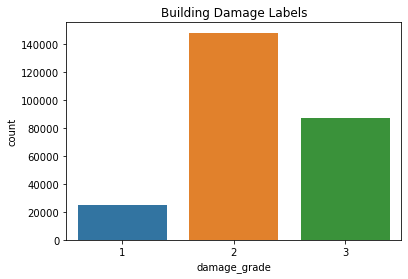

In [9]:
# Visualize the target
sns.countplot(data=merged, x='damage_grade')
plt.title('Building Damage Labels')
plt.show()

In [10]:
# Majority of level 2. Level 1 might need some weights in a model to account for unbalanced structure

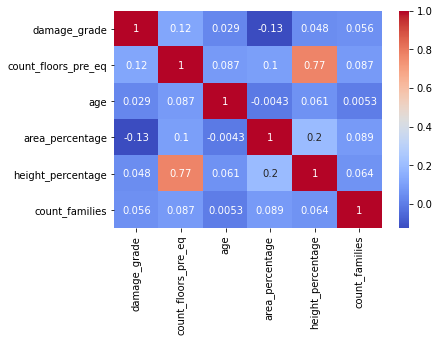

In [11]:
# Visualize correlations with relevant quantitative variables
sns.heatmap(merged[['damage_grade', 'count_floors_pre_eq', 'age',
                    'area_percentage', 'height_percentage', 'count_families']].corr(), cmap='coolwarm', annot=True)
plt.show()

In [12]:
# Positive correlation between number of floors and height makes sense.
# Slight positive correlation between number of floors and damage
# Slight negative correlation between area_perc and damage

In [13]:
# Let's merge some of the categorical binary variables
merged['superstructure'] = merged['has_superstructure_adobe_mud'].apply(
    lambda x: 'am' if x == 1 else '')+merged['has_superstructure_bamboo'].apply(lambda x: 'b' if x == 1 else '')+merged['has_superstructure_bamboo'].apply(lambda x: 'b' if x == 1 else '')+merged['has_superstructure_cement_mortar_brick'].apply(
    lambda x: 'cmb' if x == 1 else '')+merged['has_superstructure_cement_mortar_stone'].apply(lambda x: 'cms' if x == 1 else '')+merged['has_superstructure_mud_mortar_brick'].apply(lambda x: 'mmb' if x == 1 else '')+merged['has_superstructure_mud_mortar_stone'].apply(lambda x: 'mms' if x == 1 else '')+merged['has_superstructure_other'].apply(lambda x: 'o' if x == 1 else '')+merged['has_superstructure_rc_engineered'].apply(lambda x: 'rce' if x == 1 else '')+merged['has_superstructure_rc_non_engineered'].apply(lambda x: 'rcne' if x == 1 else '')+merged['has_superstructure_stone_flag'].apply(lambda x: 'sf' if x == 1 else '')+merged['has_superstructure_timber'].apply(lambda x: 't' if x == 1 else '')

In [14]:
merged['secondary_use'] = merged['has_secondary_use_agriculture'].apply(lambda x: 'ag' if x == 1 else '')+merged['has_secondary_use_gov_office'].apply(lambda x: 'gov' if x == 1 else '')+merged['has_secondary_use_health_post'].apply(lambda x: 'post' if x == 1 else '')+merged['has_secondary_use_hotel'].apply(lambda x: 'hot' if x == 1 else '')+merged['has_secondary_use_industry'].apply(
    lambda x: 'ind' if x == 1 else '')+merged['has_secondary_use_institution'].apply(lambda x: 'inst' if x == 1 else '')+merged['has_secondary_use_other'].apply(lambda x: 'o' if x == 1 else '')+merged['has_secondary_use_rental'].apply(lambda x: 'rent' if x == 1 else '')+merged['has_secondary_use_school'].apply(lambda x: 'sch' if x == 1 else '')+merged['has_secondary_use_use_police'].apply(lambda x: 'pol' if x == 1 else '')

In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 42 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

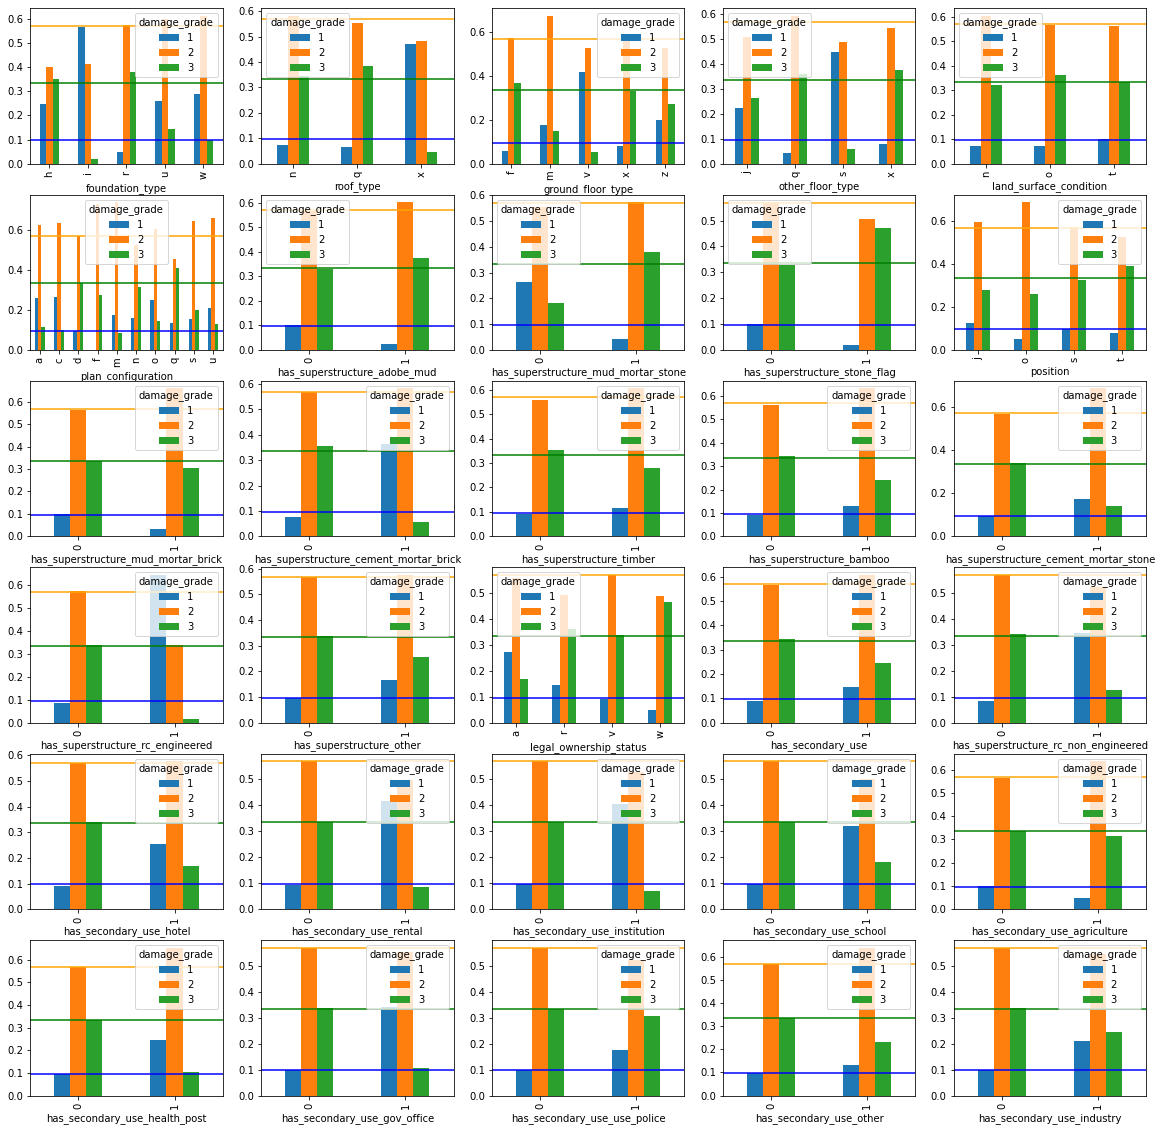

In [16]:
# Let's vizualise for cat variables without combinations
cat = merged.columns[8:27].to_list()+merged.columns[28:39].to_list()
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))
row = 0
col = 0

for var in cat:
    df = pd.crosstab(index=merged['damage_grade'],
                     columns=merged[var], normalize='columns').T
    df.plot(kind='bar', ax=axes[row//5, col % 5-1])
    axes[row//5, col % 5-1].hlines(y=merged['damage_grade'].value_counts(
        normalize=True).loc[1], xmin=axes[row//5, col % 5-1].get_xlim()[0], xmax=axes[row//5, col % 5-1].get_xlim()[1], colors='b')
    axes[row//5, col % 5-1].hlines(y=merged['damage_grade'].value_counts(normalize=True).loc[2],
                                   xmin=axes[row//5, col % 5-1].get_xlim()[0], xmax=axes[row//5, col % 5-1].get_xlim()[1], colors='orange')
    axes[row//5, col % 5-1].hlines(y=merged['damage_grade'].value_counts(normalize=True).loc[3],
                                   xmin=axes[row//5, col % 5-1].get_xlim()[0], xmax=axes[row//5, col % 5-1].get_xlim()[1], colors='green')
    row += 1
    col += 1
plt.show()

In [17]:
# Looking at the above, the variables who don't seem to have much influence are:
# - Land surface condition
# - superstructure variables at the exception of cement_mortar_brick, rc_engineered
# - secondary use in general, secondary use agriculture, secondary use police

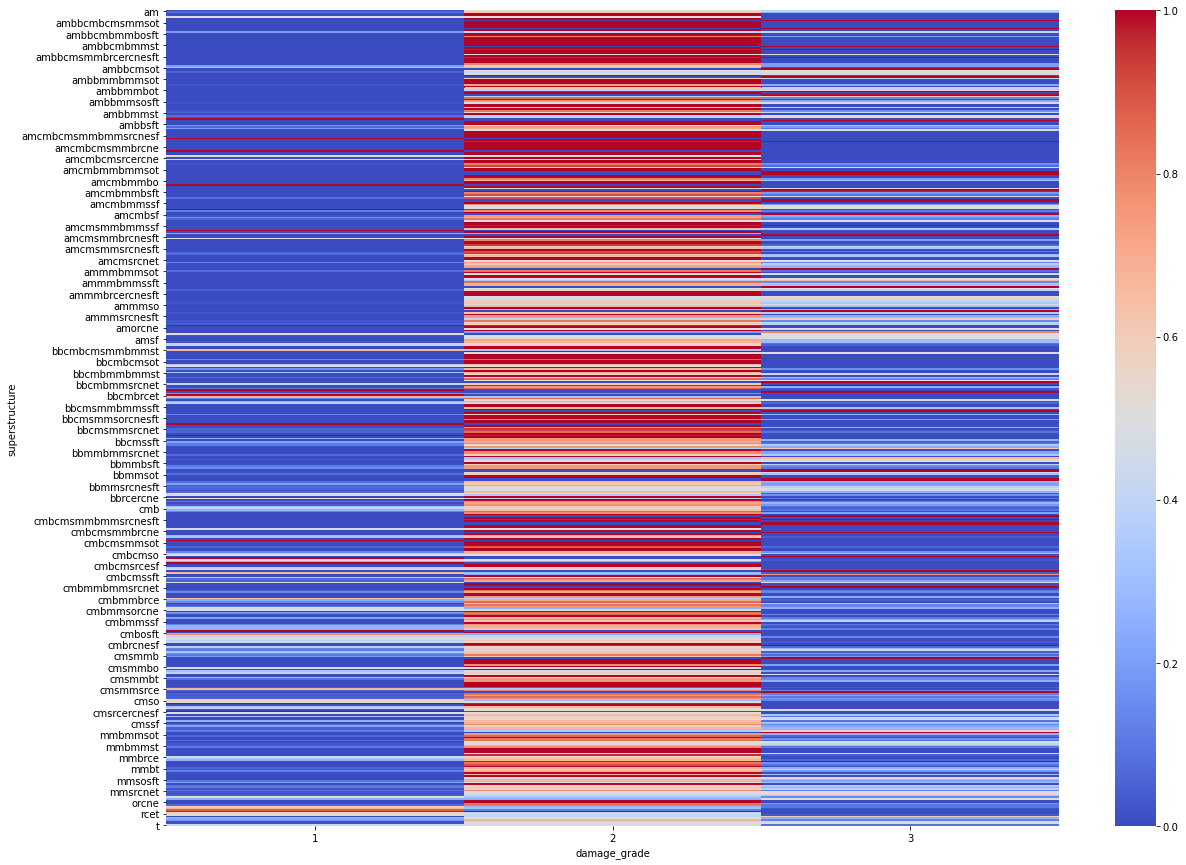

In [18]:
# Let's vizualize for combinations

df = pd.crosstab(index=merged['damage_grade'],
                 columns=merged['superstructure'], normalize='columns').T
plt.subplots(figsize=(20, 15))
sns.heatmap(df, cmap='coolwarm')
plt.show()

In [19]:
# The combination of superstructure seems to indicate more influence than just a superstructure in isolation

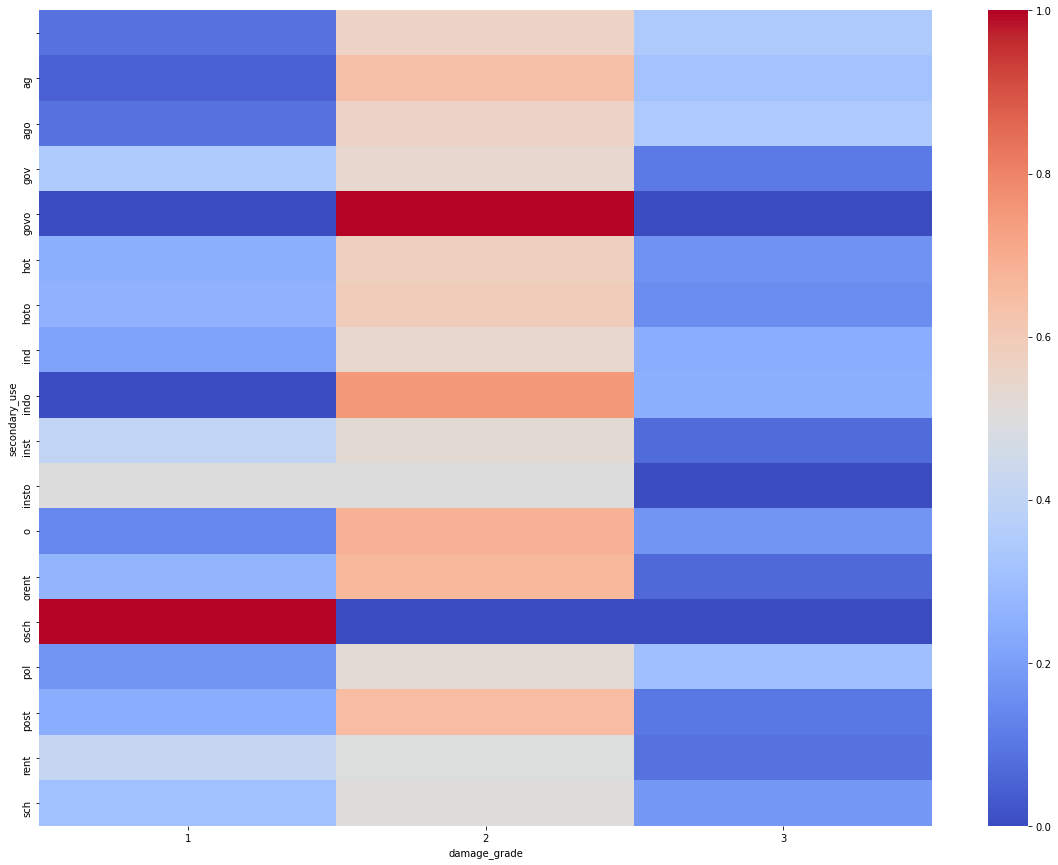

In [20]:
df = pd.crosstab(index=merged['damage_grade'],
                 columns=merged['secondary_use'], normalize='columns').T
plt.subplots(figsize=(20, 15))
sns.heatmap(df, cmap='coolwarm')
plt.show()

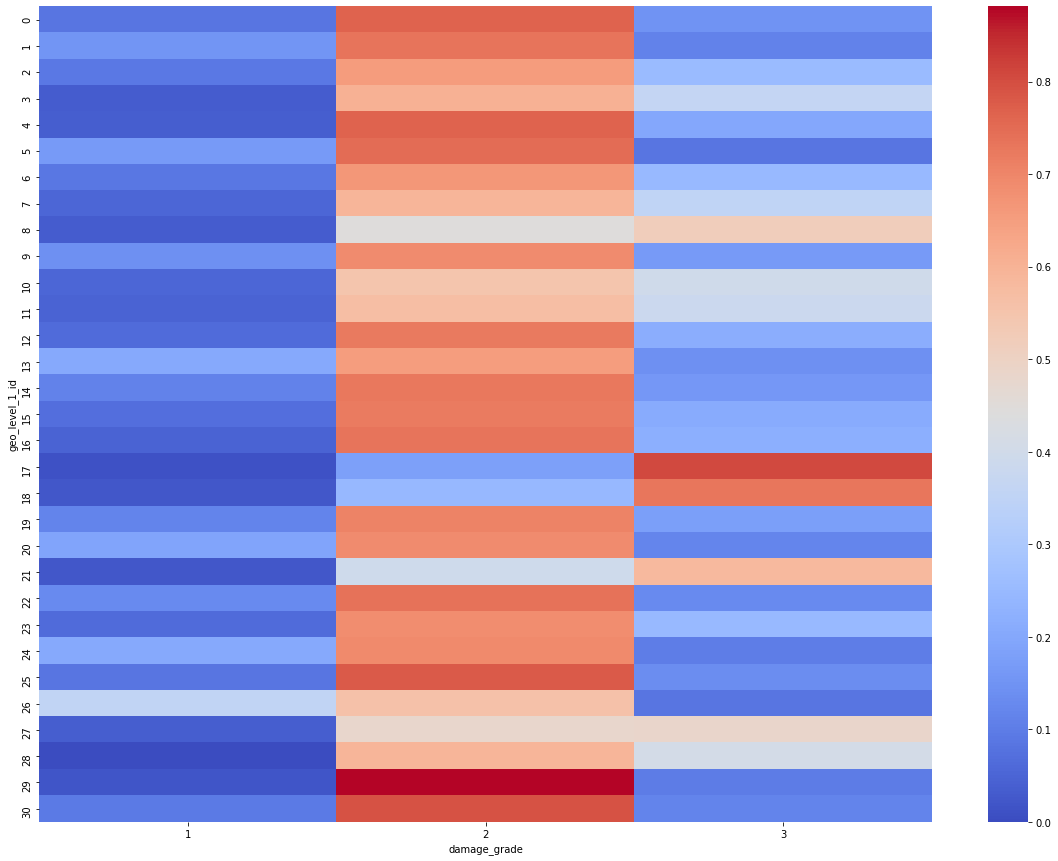

In [21]:
df = pd.crosstab(index=merged['damage_grade'],
                 columns=merged['geo_level_1_id'], normalize='columns').T
plt.subplots(figsize=(20, 15))
sns.heatmap(df, cmap='coolwarm')
plt.show()

### 3. Model

#### a. Random Forest Scikit

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold

In [ ]:
# First create X and y
X = merged.drop(['building_id', 'superstructure',
                 'secondary_use', 'damage_grade'], axis=1)

# only keeps geo_level_1 now
X.drop(['geo_level_2_id', 'geo_level_3_id'], axis=1, inplace=True)

y = merged['damage_grade']

In [ ]:
# Creates binary variables for all categorical

cat_to_bin = ['geo_level_1_id','land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position',
              'plan_configuration', 'legal_ownership_status']

# Specify geo_level_1_id as a string
X['geo_level_1_id']=X['geo_level_1_id'].astype(str)

dumm = pd.get_dummies(X[cat_to_bin])

In [ ]:
# Replace the cat variables by the dummies

X.drop(cat_to_bin, axis=1, inplace=True)
X = pd.merge(left=X, right=dumm, left_index=True, right_index=True)

In [ ]:
# First Random Forest with default parameters

rf = RandomForestClassifier()
cross_val_score(rf, X, y, cv=3, scoring='f1_micro').mean()

In [23]:
# Find the best parameters with a quick grid search

from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials, hp

In [ ]:
# Define the objective function

def objective_rf_sk(par):
    rf = RandomForestClassifier(**par)
    f1 = cross_val_score(rf, X, y, cv=3, scoring='f1_micro')
    avg_f1 = f1.mean()
    std_f1 = f1.std()

    # Hyperopt need a function to minimize. We simply multiply by -1 the F1 obtained accross the 3 folds.
    return {'loss': -1*avg_f1, 'status': STATUS_OK, 'parameters': par, 'std': std_f1}

In [ ]:
# Define the parameters space

parameter_space_rf_sk = {'n_estimators': hp.choice('iterations', [100, 200, 300, 400]), 'criterion': hp.choice('criterion', ['gini', 'entropy']),
                         'max_depth': hp.choice('max_depth',[None,hp.quniform('depth', 3, 50, 1)]), 'min_samples_split': hp.choice('min_samples_split',[2,hp.uniform('min_split', 0.01, 0.4)]),
                         'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2']), 'n_jobs': -1, 'class_weight': hp.choice('class_weight', [None, 'balanced', 'balanced_subsample'])}

In [ ]:
# # Initiate trial object
# trials = Trials()

In [ ]:
# # Run the random optimization
# opt_rf_sk = fmin(objective_rf_sk, space=parameter_space_rf_sk,
#                  algo=tpe.rand.suggest, trials=trials, max_evals=50)

In [ ]:
# pickle.dump(trials, open("rf_sk_rnd_50.p", "wb"))

In [ ]:
trials_rfskrnd50=pickle.load(open('rf_sk_rnd_50.p','rb'))

In [ ]:
trials_rfskrnd50.best_trial

#### i. Features Engineering

In [ ]:
# Let's see if we can improve the score on our best model at 0.6941 by selecting different features
# First train the best model

rfskrnd50=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
rfskrnd50.fit(X_train,y_train)

In [ ]:
pred_test_rfskrnd50=rfskrnd50.predict(X_test)
f1_score(y_test,pred_test_rfskrnd50,average='micro')

In [ ]:
pred_train_rfskrnd50=rfskrnd50.predict(X_train)
f1_score(y_train,pred_train_rfskrnd50,average='micro')

In [ ]:
# There is some overfitting.
# Let's look at features importance

In [ ]:
rfskrnd50_feat=pd.Series(index=X_train.columns,data=rfskrnd50.feature_importances_).sort_values(ascending=False)

In [ ]:
rfskrnd50_feat[rfskrnd50_feat>0.005]

In [ ]:
# Numerical variables are amongst the most important. Let's try to change the geo_level by going more granular geo indicator

In [ ]:
# First need to remove all geo_level_1:
col_drop=[]
for col in X.columns:
    if 'geo_level_1' in col:
        col_drop.append(col)
X.drop(col_drop,axis=1,inplace=True)

In [ ]:
# Then get dummies and merge with X
X['geo_level_2_id']=merged['geo_level_2_id']
X['geo_level_2_id']=X['geo_level_2_id'].astype(str)
dum=pd.get_dummies(X['geo_level_2_id'],prefix='geo_level_2_id')
X=pd.merge(left=X,right=dum,left_index=True,right_index=True)
X.drop('geo_level_2_id',axis=1,inplace=True)

In [ ]:
# Let's fit our previous rf

rfskrnd50_geo2=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_geo2, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# It seems to decrease the performance 

In [ ]:
# Let's do the same test with geo_3
col_drop=[]
for col in X.columns:
    if 'geo_level_2' in col:
        col_drop.append(col)
X.drop(col_drop,axis=1,inplace=True)
X['geo_level_3_id']=merged['geo_level_3_id']
X['geo_level_3_id']=X['geo_level_3_id'].astype(str)
dum=pd.get_dummies(X['geo_level_3_id'],prefix='geo_level_3_id')
X=pd.merge(left=X,right=dum,left_index=True,right_index=True)
X.drop('geo_level_3_id',axis=1,inplace=True)

In [ ]:
rfskrnd50_geo3=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_geo3, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# Even worst

In [ ]:
# feat to try:
# - number of families vs size of the building: floor/fam number, are/fam number, heigth/fam number, area*height/fam
# - is it tall floors or not ? height/floor

In [ ]:
# Let's now try floor/fam number

# First put back geo_1
col_drop=[]
for col in X.columns:
    if 'geo_level_3' in col:
        col_drop.append(col)
X.drop(col_drop,axis=1,inplace=True)
X['geo_level_1_id']=merged['geo_level_1_id']
X['geo_level_1_id']=X['geo_level_1_id'].astype(str)
dum=pd.get_dummies(X['geo_level_1_id'],prefix='geo_level_1_id')
X=pd.merge(left=X,right=dum,left_index=True,right_index=True)
X.drop('geo_level_1_id',axis=1,inplace=True)

# Then create new feature
X['floor/fam']=X['count_floors_pre_eq']/X['count_families']

In [ ]:
# Replace infinity by 0
X['floor/fam'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_floorfam=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_floorfam, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# We are not far from the base without relaunching some tuning of parameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_floorfam.fit(X_train,y_train)
rfskrnd50_floorfam_feat=pd.Series(index=X_train.columns,data=rfskrnd50_floorfam.feature_importances_).sort_values(ascending=False)
rfskrnd50_floorfam_feat[rfskrnd50_floorfam_feat>0.005]

In [ ]:
# Let's try area/fam

X.drop('floor/fam',axis=1,inplace=True)
X['area/fam']=X['area_percentage']/X['count_families']

In [ ]:
X['area/fam'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_areafam=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_areafam, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# We are not far from the base without relaunching some tuning of parameters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_areafam.fit(X_train,y_train)
rfskrnd50_areafam_feat=pd.Series(index=X_train.columns,data=rfskrnd50_areafam.feature_importances_).sort_values(ascending=False)
rfskrnd50_areafam_feat[rfskrnd50_areafam_feat>0.005]

In [ ]:
# Let's try height/fam
X.drop('area/fam',axis=1,inplace=True)
X['height/fam']=X['height_percentage']/X['count_families']
X['height/fam'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_heightfam=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_heightfam, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# Slight improvement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_heightfam.fit(X_train,y_train)
rfskrnd50_heightfam_feat=pd.Series(index=X_train.columns,data=rfskrnd50_heightfam.feature_importances_).sort_values(ascending=False)
rfskrnd50_heightfam_feat[rfskrnd50_heightfam_feat>0.005]

In [ ]:
# Let's try area*height/fam
X.drop('height/fam',axis=1,inplace=True)
X['areaheight/fam']=(X['height_percentage']*X['area_percentage'])/X['count_families']
X['areaheight/fam'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_areaheightfam=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_areaheightfam, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# Not far from base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_areaheightfam.fit(X_train,y_train)
rfskrnd50_areaheightfam_feat=pd.Series(index=X_train.columns,data=rfskrnd50_areaheightfam.feature_importances_).sort_values(ascending=False)
rfskrnd50_areaheightfam_feat[rfskrnd50_areaheightfam_feat>0.005]

In [ ]:
# Let's try height/floor
X.drop('areaheight/fam',axis=1,inplace=True)
X['height/floor']=X['height_percentage']/X['count_floors_pre_eq']
X['height/floor'].replace(to_replace=np.inf,value=0,inplace=True)

In [ ]:
rfskrnd50_heightfloor=RandomForestClassifier(criterion=trials_rfskrnd50.best_trial['result']['parameters']['criterion'],
                                  max_depth=trials_rfskrnd50.best_trial['result']['parameters']['max_depth'],
                                 max_features=trials_rfskrnd50.best_trial['result']['parameters']['max_features'],
                                 n_estimators=trials_rfskrnd50.best_trial['result']['parameters']['n_estimators'],
                                 n_jobs=-1)

In [ ]:
cross_val_score(rfskrnd50_heightfloor, X, y, cv=3, scoring='f1_micro').mean()

In [ ]:
# Best improvement so far
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rfskrnd50_heightfloor.fit(X_train,y_train)
rfskrnd50_heightfloor_feat=pd.Series(index=X_train.columns,data=rfskrnd50_heightfloor.feature_importances_).sort_values(ascending=False)
rfskrnd50_heightfloor_feat[rfskrnd50_heightfloor_feat>0.005]

In [ ]:
# Let's try to hypertune with the new features which did not deteriorate the perf or were close to the baseline score.
# RF should be quite unsensitive to useless features

X['areaheight/fam']=(X['height_percentage']*X['area_percentage'])/X['count_families']
X['areaheight/fam'].replace(to_replace=np.inf,value=0,inplace=True)
X['height/fam']=X['height_percentage']/X['count_families']
X['height/fam'].replace(to_replace=np.inf,value=0,inplace=True)
X['area/fam']=X['area_percentage']/X['count_families']
X['area/fam'].replace(to_replace=np.inf,value=0,inplace=True)
X['floor/fam']=X['count_floors_pre_eq']/X['count_families']
X['floor/fam'].replace(to_replace=np.inf,value=0,inplace=True)


In [ ]:
# Run the random optimization
trials_rfskrnd50feateng=Trials()
opt_rfskfeateng = fmin(objective_rf_sk, space=parameter_space_rf_sk,
                 algo=tpe.rand.suggest, trials=trials_rfskrnd50feateng, max_evals=100)

#### b. Random Forest H2O

In [ ]:
# H2O implementation of RF enables to perform separation of categorical variables as opposed to scikit which can only handle binary split

In [92]:
import h2o

In [93]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.291-b10, mixed mode)
  Starting server from C:\Users\mrnpe\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\mrnpe\AppData\Local\Temp\tmpm8oh_jf7
  JVM stdout: C:\Users\mrnpe\AppData\Local\Temp\tmpm8oh_jf7\h2o_mrnpe_started_from_python.out
  JVM stderr: C:\Users\mrnpe\AppData\Local\Temp\tmpm8oh_jf7\h2o_mrnpe_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  ---------------------------------------------------------
H2O_cluster_uptime:         01 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.2
H2O_cluster_version_age:    8 days
H2O_cluster_name:           H2O_from_python_mrnpe_h69xj3
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    14.21 Gb
H2O_cluster_total_cores:    12
H2O_cluster_allowed_cores:  12
H2O_cluster_status:         accepting new members, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.8.8 final
--------------------------  ---------------------------------------------------------

In [94]:
from h2o.estimators import H2ORandomForestEstimator

In [ ]:
f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator()
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')
    
    
    

In [ ]:
# Better results than the Scikit RF and not too much overfitting

In [ ]:
# Let's now try again but this time we use geo_level_2_id
f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_1_id','geo_level_3_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_1_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_2_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_2_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator(nbins_cats=1414)
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')


In [ ]:
# Performance is increased but there is more overfitting. There are also pb of unseen values during the training.
# Let's try with geo_level_id_3

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_1_id','geo_level_2_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_1_id','geo_level_2_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator(nbins_cats=11595)
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')

In [ ]:
# slightly better with more overfitting
# let's now try with height/floor variable and geolevel 1

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

merged['height/floor']=merged['height_percentage']/merged['count_floors_pre_eq']
merged['height/floor'].replace(to_replace=np.inf,value=0,inplace=True)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator()
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')


In [ ]:
# Minor improvement but the overfitting does not increase much
# Let's now try height/fam

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

merged['height/fam']=merged['height_percentage']/merged['count_families']
merged['height/fam'].replace(to_replace=np.inf,value=0,inplace=True)
merged.drop('height/floor',axis=1,inplace=True)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator()
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')

In [ ]:
# Slight deterioration
# Let's now try with our 2 best new features height/floor and geo_level_3

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)

merged['height/floor']=merged['height_percentage']/merged['count_floors_pre_eq']
merged['height/floor'].replace(to_replace=np.inf,value=0,inplace=True)
merged.drop('height/fam',axis=1,inplace=True)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
    data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
    data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator(nbins_cats=11595)
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')

In [ ]:
# The improvement is marginal when adding height/floor
# Let's now try with superstructure and geo_level_1

f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)
merged.drop('height/floor',axis=1,inplace=True)
to_drop=[]
for col in merged.columns:
    if 'has_super' in col:
        to_drop.append(col)
merged_super=merged.drop(to_drop,axis=1)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged_super.drop('damage_grade',axis=1),merged_super['damage_grade']):
    data_train=merged_super.loc[train].drop(['building_id','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_test=merged_super.loc[test].drop(['building_id','secondary_use','geo_level_2_id','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator(nbins_cats=505)
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')


In [ ]:
# marginal improvement. Let's try with secondary use
f1_test=[]
f1_train=[]
skf=StratifiedKFold(n_splits=3)
to_drop=[]
for col in merged.columns:
    if 'has_secondary' in col:
        to_drop.append(col)
merged_secondary=merged.drop(to_drop,axis=1)

# Split the data with a 3 fold approach:
for train,test in skf.split(merged_secondary.drop('damage_grade',axis=1),merged_secondary['damage_grade']):
    data_train=merged_secondary.loc[train].drop(['building_id','geo_level_2_id','superstructure','geo_level_3_id'],axis=1)
    data_test=merged_secondary.loc[test].drop(['building_id','geo_level_2_id','superstructure','geo_level_3_id'],axis=1)
    data_train=h2o.H2OFrame(data_train,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    data_test=h2o.H2OFrame(data_test,column_types={'geo_level_1_id':'factor','damage_grade':'factor'})
    x=data_train.names
    x.remove('damage_grade')
    y='damage_grade'
    rf_h2o=H2ORandomForestEstimator()
    rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
    predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
    test=data_test.as_data_frame()['damage_grade']
    f1_test.append(f1_score(test,predictions,average='micro'))
    predictions_train=rf_h2o.predict(data_train).as_data_frame()['predict']
    train=data_train.as_data_frame()['damage_grade']
    f1_train.append(f1_score(train,predictions_train,average='micro'))
    

f1_test=np.array(f1_test).mean()
f1_train=np.array(f1_train).mean()
print(f'The f1 on test is {f1_test} and is {f1_train} on train')


In [ ]:
# Marginal improvement.

# Conclusion is that only the inclusion of geo_level_3 seems to improve perf but leads to overfitting. 
# Let's try to tune the hyperparameters with the model with geo_3
# we have overfitting. So we are going to search with parameters which could decrease overfitting

In [ ]:
# # Let's try a quick tuning of parameters

# def objective_rf_h2o_geo3(par):
#     f1_test=[]
#     # Split the data with a 3 fold approach:
#     for train,test in skf.split(merged.drop('damage_grade',axis=1),merged['damage_grade']):
#         data_train=merged.loc[train].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
#         data_test=merged.loc[test].drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
#         data_train=h2o.H2OFrame(data_train,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
#         data_test=h2o.H2OFrame(data_test,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
#         x=data_train.names
#         x.remove('damage_grade')
#         y='damage_grade'
#         rf_h2o=H2ORandomForestEstimator(**par)
#         rf_h2o.train(x=x,y=y,training_frame=data_train,validation_frame=data_test)
#         predictions=rf_h2o.predict(data_test).as_data_frame()['predict']
#         test=data_test.as_data_frame()['damage_grade']
#         f1_test.append(f1_score(test,predictions,average='micro'))
      
#     f1_test=np.array(f1_test).mean()
#     std_f1=np.array(f1_test).std()
#     # Hyperopt need a function to minimize. We simply multiply by -1 the F1 obtained accross the 3 folds.
#     return {'loss': -1*f1_test, 'status': STATUS_OK, 'parameters': par, 'std': std_f1}

In [ ]:
# # Define the parameters space

# parameter_space_rf_h2o = {'balance_classes': hp.choice('balance_classes', [False, True]), 'ntrees': hp.choice('ntrees', [50,100]),
#                          'max_depth': hp.randint('max_depth', 10, 30), 'min_rows': hp.quniform('min_rows', 1, 50,1),'nbins_cats':hp.choice('nbins_cats',[2000,5000,7000,9000,12000])}

In [ ]:
# # Run the random optimization
# trials = Trials()
# opt_rf_h2o = fmin(objective_rf_h2o_geo3, space=parameter_space_rf_h2o,
#                  algo=tpe.rand.suggest, trials=trials, max_evals=50)

In [ ]:
# # Not much improvement after 25 iterations. Let's look at the effect of nbins_cats
# bin_cats=[]
# loss=[]
# for result in trials.results:
#     bin_cats.append(result['parameters']['nbins_cats'])
#     loss.append(result['loss'])

In [ ]:
# plt.scatter(x=bin_cats,y=loss)

In [ ]:
# # for max_depth
# depth=[]
# loss=[]
# for result in trials.results:
#     depth.append(result['parameters']['max_depth'])
#     loss.append(result['loss'])
# plt.scatter(x=depth,y=loss)

In [ ]:
# trials.best_trial

In [ ]:
# # Let's try a submission on our best model
# # first we will refit the model with whole dataset

# rf_h2o_best=H2ORandomForestEstimator(max_depth=16,min_rows=7,nbins_cats=12000)
# data=merged.drop(['building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
# data=h2o.H2OFrame(data,column_types={'geo_level_3_id':'factor','damage_grade':'factor'})
# x=data.names
# x.remove('damage_grade')
# y='damage_grade'
# rf_h2o_best.train(x=x,y=y,training_frame=data)

In [ ]:
# submission=pd.read_csv('test_values.csv')

In [ ]:
# submission.drop(['building_id','geo_level_1_id','geo_level_2_id'],axis=1,inplace=True)

In [ ]:
# submission=h2o.H2OFrame(submission,column_types={'geo_level_3_id':'factor'})

In [ ]:
# submission= rf_h2o_best.predict(submission).as_data_frame()

In [ ]:
# file=pd.DataFrame({'building_id':pd.read_csv('test_values.csv')['building_id'],'damage_grade':submission['predict']})

In [ ]:
# file.to_csv('submission_rf_h2o.csv',index=False)

In [ ]:
# Score 0.7474 reaching 151 out of 4180

#### C. Gradient Boosting

#### i. Catboost

In [42]:
from catboost import CatBoostClassifier,Pool,cv

In [51]:
X=merged.drop(['damage_grade','building_id','superstructure','secondary_use','geo_level_2_id','geo_level_1_id'],axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [52]:
cv_data

iterations  test-TotalF1:average=Micro-mean  \
0              0                         0.699360   
1              1                         0.675416   
2              2                         0.676766   
3              3                         0.671931   
4              4                         0.596429   
...          ...                              ...   
7995        7995                         0.731655   
7996        7996                         0.731663   
7997        7997                         0.731674   
7998        7998                         0.731666   
7999        7999                         0.731682   

      test-TotalF1:average=Micro-std  train-TotalF1:average=Micro-mean  \
0                           0.000185                          0.683551   
1                           0.000494                          0.666745   
2                           0.003272                          0.668986   
3                           0.004475                          0.664265   
4                           0.001626                          0.595161   
...                              ...                               ...   
7995                        0.001388                          0.743579   
7996                        0.001395                          0.743566   
7997                        0.001386                          0.743572   
7998                        0.001399                          0.743568   
7999                        0.001433                          0.743560   

      train-TotalF1:average=Micro-std  test-MultiClass-mean  \
0                            0.000438              1.078410   
1                            0.000193              1.066329   
2                            0.002618              1.054649   
3                            0.003147              1.044873   
4                            0.002224              1.035423   
...                               ...                   ...   
7995                         0.000540              0.610760   
7996                         0.000539              0.610759   
7997                         0.000528              0.610761   
7998                         0.000522              0.610760   
7999                         0.000534              0.610760   

      test-MultiClass-std  train-MultiClass-mean  train-MultiClass-std  
0                0.000040               1.079354              0.000032  
1                0.000027               1.067280              0.000042  
2                0.000031               1.055584              0.000055  
3                0.000058               1.045747              0.000074  
4                0.000232               1.036288              0.000156  
...                   ...                    ...                   ...  
7995             0.000471               0.588084              0.001289  
7996             0.000471               0.588077              0.001290  
7997             0.000471               0.588074              0.001290  
7998             0.000473               0.588068              0.001290  
7999             0.000472               0.588060              0.001292  

[8000 rows x 9 columns]

In [53]:
# We are not far from the H2o rf
# Let's check if geo_2 works better

X=merged.drop(['damage_grade','building_id','superstructure','secondary_use','geo_level_3_id','geo_level_1_id'],axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [54]:
# Let's try geo_1
X=merged.drop(['damage_grade','building_id','superstructure','secondary_use','geo_level_3_id','geo_level_2_id'],axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [55]:
# Worst so far. Let's try all the geo
X=merged.drop(['damage_grade','building_id','superstructure','secondary_use'],axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [56]:
cv_data

iterations  test-TotalF1:average=Micro-mean  \
0              0                         0.700205   
1              1                         0.693812   
2              2                         0.691690   
3              3                         0.691183   
4              4                         0.683950   
...          ...                              ...   
7995        7995                         0.743117   
7996        7996                         0.743121   
7997        7997                         0.743125   
7998        7998                         0.743136   
7999        7999                         0.743159   

      test-TotalF1:average=Micro-std  train-TotalF1:average=Micro-mean  \
0                           0.000363                          0.691707   
1                           0.002291                          0.688769   
2                           0.001299                          0.687236   
3                           0.000458                          0.686947   
4                           0.001488                          0.679842   
...                              ...                               ...   
7995                        0.000810                          0.764469   
7996                        0.000812                          0.764477   
7997                        0.000795                          0.764487   
7998                        0.000847                          0.764477   
7999                        0.000795                          0.764492   

      train-TotalF1:average=Micro-std  test-MultiClass-mean  \
0                            0.001207              1.077298   
1                            0.001409              1.059079   
2                            0.000925              1.047721   
3                            0.000691              1.036819   
4                            0.001232              1.027383   
...                               ...                   ...   
7995                         0.000179              0.581660   
7996                         0.000162              0.581660   
7997                         0.000160              0.581659   
7998                         0.000175              0.581659   
7999                         0.000193              0.581659   

      test-MultiClass-std  train-MultiClass-mean  train-MultiClass-std  
0                0.000148               1.078094              0.000027  
1                0.000199               1.060011              0.000050  
2                0.000202               1.048649              0.000071  
3                0.000224               1.037735              0.000065  
4                0.000303               1.028351              0.000098  
...                   ...                    ...                   ...  
7995             0.000293               0.538928              0.001363  
7996             0.000293               0.538921              0.001363  
7997             0.000292               0.538914              0.001365  
7998             0.000291               0.538909              0.001366  
7999             0.000289               0.538903              0.001368  

[8000 rows x 9 columns]

In [57]:
#Let's rekeep the above all geo but let's replace with superstructure

to_drop=[]
for col in merged.columns:
    if 'has_super' in col:
        to_drop.append(col)

X=merged.drop(['damage_grade','building_id','secondary_use']+to_drop,axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [58]:
cv_data

iterations  test-TotalF1:average=Micro-mean  \
0              0                         0.699291   
1              1                         0.694571   
2              2                         0.694767   
3              3                         0.696406   
4              4                         0.696571   
...          ...                              ...   
7995        7995                         0.742388   
7996        7996                         0.742388   
7997        7997                         0.742395   
7998        7998                         0.742407   
7999        7999                         0.742403   

      test-TotalF1:average=Micro-std  train-TotalF1:average=Micro-mean  \
0                           0.000380                          0.689947   
1                           0.001282                          0.689842   
2                           0.001023                          0.690419   
3                           0.001293                          0.692064   
4                           0.000755                          0.692252   
...                              ...                               ...   
7995                        0.000641                          0.763222   
7996                        0.000641                          0.763228   
7997                        0.000642                          0.763217   
7998                        0.000650                          0.763222   
7999                        0.000654                          0.763226   

      train-TotalF1:average=Micro-std  test-MultiClass-mean  \
0                            0.000299              1.077527   
1                            0.000980              1.058297   
2                            0.000342              1.043324   
3                            0.000386              1.032307   
4                            0.000384              1.021783   
...                               ...                   ...   
7995                         0.000543              0.583224   
7996                         0.000546              0.583223   
7997                         0.000541              0.583222   
7998                         0.000546              0.583222   
7999                         0.000547              0.583222   

      test-MultiClass-std  train-MultiClass-mean  train-MultiClass-std  
0                0.000105               1.078103              0.000054  
1                0.000119               1.059066              0.000041  
2                0.000159               1.044092              0.000119  
3                0.000156               1.033074              0.000133  
4                0.000166               1.022553              0.000150  
...                   ...                    ...                   ...  
7995             0.000251               0.540734              0.001864  
7996             0.000251               0.540728              0.001871  
7997             0.000252               0.540722              0.001870  
7998             0.000252               0.540716              0.001869  
7999             0.000253               0.540709              0.001868  

[8000 rows x 9 columns]

In [59]:
# Slightly less good. Lets try secondary_use

to_drop=[]
for col in merged.columns:
    if 'has_second' in col:
        to_drop.append(col)

X=merged.drop(['damage_grade','building_id','superstructure']+to_drop,axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [60]:
cv_data

iterations  test-TotalF1:average=Micro-mean  \
0              0                         0.699291   
1              1                         0.690876   
2              2                         0.693455   
3              3                         0.691905   
4              4                         0.686475   
...          ...                              ...   
7995        7995                         0.742787   
7996        7996                         0.742779   
7997        7997                         0.742787   
7998        7998                         0.742772   
7999        7999                         0.742760   

      test-TotalF1:average=Micro-std  train-TotalF1:average=Micro-mean  \
0                           0.000380                          0.689947   
1                           0.002863                          0.686809   
2                           0.000701                          0.688689   
3                           0.001914                          0.687298   
4                           0.001895                          0.682281   
...                              ...                               ...   
7995                        0.000848                          0.764621   
7996                        0.000829                          0.764642   
7997                        0.000846                          0.764640   
7998                        0.000850                          0.764634   
7999                        0.000818                          0.764652   

      train-TotalF1:average=Micro-std  test-MultiClass-mean  \
0                            0.000299              1.077527   
1                            0.000689              1.059260   
2                            0.000482              1.050018   
3                            0.000977              1.038928   
4                            0.000867              1.028326   
...                               ...                   ...   
7995                         0.000522              0.582119   
7996                         0.000504              0.582117   
7997                         0.000494              0.582116   
7998                         0.000481              0.582112   
7999                         0.000486              0.582111   

      test-MultiClass-std  train-MultiClass-mean  train-MultiClass-std  
0                0.000105               1.078103              0.000054  
1                0.000142               1.059941              0.000077  
2                0.000145               1.050695              0.000088  
3                0.000144               1.039605              0.000093  
4                0.000155               1.029006              0.000102  
...                   ...                    ...                   ...  
7995             0.000135               0.538345              0.001493  
7996             0.000135               0.538337              0.001490  
7997             0.000135               0.538329              0.001489  
7998             0.000132               0.538322              0.001493  
7999             0.000130               0.538314              0.001497  

[8000 rows x 9 columns]

In [ ]:
# A marginal improvement from 0.7424 to 0.7427

In [61]:
#let's try our best all geo+secondary_use but we add height/floor
merged['height/floor']=merged['height_percentage']/merged['count_floors_pre_eq']
merged['height/floor'].replace(to_replace=np.inf,value=0,inplace=True)

to_drop=[]
for col in merged.columns:
    if 'has_second' in col:
        to_drop.append(col)

X=merged.drop(['damage_grade','building_id','superstructure']+to_drop,axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [62]:
cv_data

iterations  test-TotalF1:average=Micro-mean  \
0              0                         0.698938   
1              1                         0.695182   
2              2                         0.692196   
3              3                         0.690880   
4              4                         0.685339   
...          ...                              ...   
7995        7995                         0.742729   
7996        7996                         0.742702   
7997        7997                         0.742683   
7998        7998                         0.742695   
7999        7999                         0.742722   

      test-TotalF1:average=Micro-std  train-TotalF1:average=Micro-mean  \
0                           0.001961                          0.688033   
1                           0.001197                          0.689251   
2                           0.001544                          0.687129   
3                           0.001340                          0.685197   
4                           0.002515                          0.679924   
...                              ...                               ...   
7995                        0.000913                          0.764993   
7996                        0.000939                          0.764986   
7997                        0.000920                          0.764991   
7998                        0.000926                          0.764986   
7999                        0.000930                          0.765012   

      train-TotalF1:average=Micro-std  test-MultiClass-mean  \
0                            0.003711              1.077220   
1                            0.002092              1.058987   
2                            0.001401              1.049748   
3                            0.000376              1.038714   
4                            0.000833              1.027994   
...                               ...                   ...   
7995                         0.000460              0.581743   
7996                         0.000458              0.581744   
7997                         0.000424              0.581745   
7998                         0.000433              0.581745   
7999                         0.000424              0.581743   

      test-MultiClass-std  train-MultiClass-mean  train-MultiClass-std  
0                0.000400               1.078125              0.000066  
1                0.000411               1.060028              0.000116  
2                0.000385               1.050789              0.000116  
3                0.000361               1.039750              0.000108  
4                0.000344               1.029026              0.000108  
...                   ...                    ...                   ...  
7995             0.000250               0.537642              0.001369  
7996             0.000250               0.537636              0.001368  
7997             0.000249               0.537630              0.001367  
7998             0.000248               0.537623              0.001366  
7999             0.000246               0.537614              0.001369  

[8000 rows x 9 columns]

In [ ]:
# A very marginal decrease.

In [64]:
# Let's try all geo and secondary use and we add height/fam
merged.drop('height/floor',axis=1,inplace=True)
merged['height/fam']=merged['height_percentage']/merged['count_families']
merged['height/fam'].replace(to_replace=np.inf,value=0,inplace=True)

to_drop=[]
for col in merged.columns:
    if 'has_second' in col:
        to_drop.append(col)

X=merged.drop(['damage_grade','building_id','superstructure']+to_drop,axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (500 iterations wait)


In [65]:
cv_data

iterations  test-TotalF1:average=Micro-mean  \
0              0                         0.698938   
1              1                         0.695182   
2              2                         0.692196   
3              3                         0.690880   
4              4                         0.685339   
...          ...                              ...   
6199        6199                         0.741793   
6200        6200                         0.741797   
6201        6201                         0.741808   
6202        6202                         0.741816   
6203        6203                         0.741789   

      test-TotalF1:average=Micro-std  train-TotalF1:average=Micro-mean  \
0                           0.001961                          0.688033   
1                           0.001197                          0.689251   
2                           0.001544                          0.687129   
3                           0.001340                          0.685197   
4                           0.002515                          0.679924   
...                              ...                               ...   
6199                        0.000468                          0.758679   
6200                        0.000449                          0.758679   
6201                        0.000468                          0.758689   
6202                        0.000475                          0.758679   
6203                        0.000482                          0.758667   

      train-TotalF1:average=Micro-std  test-MultiClass-mean  \
0                            0.003711              1.077220   
1                            0.002092              1.058987   
2                            0.001401              1.049748   
3                            0.000376              1.038714   
4                            0.000833              1.027994   
...                               ...                   ...   
6199                         0.000346              0.583496   
6200                         0.000346              0.583495   
6201                         0.000340              0.583495   
6202                         0.000319              0.583495   
6203                         0.000319              0.583494   

      test-MultiClass-std  train-MultiClass-mean  train-MultiClass-std  
0                0.000400               1.078125              0.000066  
1                0.000411               1.060028              0.000116  
2                0.000385               1.050789              0.000116  
3                0.000361               1.039750              0.000108  
4                0.000344               1.029026              0.000108  
...                   ...                    ...                   ...  
6199             0.000300               0.550233              0.001310  
6200             0.000298               0.550225              0.001312  
6201             0.000299               0.550218              0.001314  
6202             0.000300               0.550213              0.001316  
6203             0.000301               0.550204              0.001319  

[6204 rows x 9 columns]

In [ ]:
# A slight deterioration from 0.7427 to 0.7418

In [66]:
# Let's try all geo and secondary use and we add area/fam

merged.drop('height/fam',axis=1,inplace=True)

merged['area/fam']=merged['area_percentage']/merged['count_families']
merged['area/fam'].replace(to_replace=np.inf,value=0,inplace=True)

to_drop=[]
for col in merged.columns:
    if 'has_second' in col:
        to_drop.append(col)

X=merged.drop(['damage_grade','building_id','superstructure']+to_drop,axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Stopped by overfitting detector  (500 iterations wait)


In [67]:
cv_data

iterations  test-TotalF1:average=Micro-mean  \
0              0                         0.698938   
1              1                         0.695182   
2              2                         0.692177   
3              3                         0.690880   
4              4                         0.685354   
...          ...                              ...   
4765        4765                         0.741475   
4766        4766                         0.741501   
4767        4767                         0.741494   
4768        4768                         0.741505   
4769        4769                         0.741490   

      test-TotalF1:average=Micro-std  train-TotalF1:average=Micro-mean  \
0                           0.001961                          0.688033   
1                           0.001197                          0.689251   
2                           0.001526                          0.687140   
3                           0.001340                          0.685199   
4                           0.002517                          0.679909   
...                              ...                               ...   
4765                        0.000444                          0.753643   
4766                        0.000427                          0.753662   
4767                        0.000411                          0.753648   
4768                        0.000432                          0.753664   
4769                        0.000423                          0.753669   

      train-TotalF1:average=Micro-std  test-MultiClass-mean  \
0                            0.003711              1.077220   
1                            0.002092              1.058987   
2                            0.001409              1.049752   
3                            0.000379              1.038717   
4                            0.000812              1.027997   
...                               ...                   ...   
4765                         0.000032              0.584970   
4766                         0.000021              0.584969   
4767                         0.000017              0.584968   
4768                         0.000016              0.584966   
4769                         0.000052              0.584963   

      test-MultiClass-std  train-MultiClass-mean  train-MultiClass-std  
0                0.000400               1.078125              0.000066  
1                0.000411               1.060028              0.000116  
2                0.000391               1.050791              0.000120  
3                0.000367               1.039751              0.000111  
4                0.000350               1.029028              0.000110  
...                   ...                    ...                   ...  
4765             0.000355               0.561066              0.000921  
4766             0.000356               0.561061              0.000918  
4767             0.000356               0.561052              0.000923  
4768             0.000357               0.561046              0.000919  
4769             0.000358               0.561039              0.000916  

[4770 rows x 9 columns]

In [ ]:
# Deterioration 

In [68]:
# Let's try all geo and secondary use and we add areaheight/fam

merged.drop('area/fam',axis=1,inplace=True)

merged['areaheight/fam']=(merged['area_percentage']*merged['height_percentage'])/merged['count_families']
merged['areaheight/fam'].replace(to_replace=np.inf,value=0,inplace=True)

to_drop=[]
for col in merged.columns:
    if 'has_second' in col:
        to_drop.append(col)

X=merged.drop(['damage_grade','building_id','superstructure']+to_drop,axis=1)
y=merged['damage_grade']

cat_feat_loc = []
for col in X.select_dtypes('object').columns:
    cat_feat_loc.append(X.columns.get_loc(col))
cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))
cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))


pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

params = {}
params['loss_function'] = 'MultiClass'
params['n_estimators'] = 8000
params['eval_metric'] = 'TotalF1:average=Micro'
params['task_type'] = 'GPU'
params['early_stopping_rounds'] = 500
params['use_best_model'] = True

cv_data = cv(
    params = params,
    pool = pool,
    fold_count=3,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=True,
    verbose=False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [131]:
cv_data

iterations  test-TotalF1:average=Micro-mean  \
0              0                         0.614272   
1              1                         0.621546   
2              2                         0.653419   
3              3                         0.665704   
4              4                         0.661275   
...          ...                              ...   
6496        6496                         0.732824   
6497        6497                         0.732801   
6498        6498                         0.732804   
6499        6499                         0.732852   
6500        6500                         0.732862   

      test-TotalF1:average=Micro-std  train-TotalF1:average=Micro-mean  \
0                           0.004115                          0.591045   
1                           0.001557                          0.612076   
2                           0.000965                          0.645137   
3                           0.001194                          0.653982   
4                           0.002188                          0.656749   
...                              ...                               ...   
6496                        0.002531                          0.769503   
6497                        0.002554                          0.769533   
6498                        0.002518                          0.769552   
6499                        0.002493                          0.769552   
6500                        0.002501                          0.769554   

      train-TotalF1:average=Micro-std  test-MultiClass-mean  \
0                            0.004061              1.083717   
1                            0.003726              1.070996   
2                            0.002240              1.062145   
3                            0.000781              1.053743   
4                            0.001615              1.041175   
...                               ...                   ...   
6496                         0.001323              0.607335   
6497                         0.001305              0.607336   
6498                         0.001316              0.607339   
6499                         0.001321              0.607336   
6500                         0.001314              0.607336   

      test-MultiClass-std  train-MultiClass-mean  train-MultiClass-std  
0                0.000192               1.084952              0.000161  
1                0.000093               1.072388              0.000344  
2                0.000078               1.063539              0.000298  
3                0.000083               1.055117              0.000293  
4                0.000208               1.042705              0.000208  
...                   ...                    ...                   ...  
6496             0.001940               0.540096              0.002310  
6497             0.001942               0.540087              0.002306  
6498             0.001939               0.540079              0.002304  
6499             0.001940               0.540063              0.002300  
6500             0.001942               0.540055              0.002296  

[6501 rows x 9 columns]

In [70]:
# Deterioration

# Our best cat model is at 0.7431 with all geo features
# Let's try a submission with it

In [106]:
try:
    merged.drop('areaheight/fam',axis=1,inplace=True)
finally:
    
    # We first refit on the whole dataset


    X=merged.drop(['damage_grade','building_id','superstructure','secondary_use'],axis=1)
    y=merged['damage_grade']

    cat_feat_loc = []
    for col in X.select_dtypes('object').columns:
        cat_feat_loc.append(X.columns.get_loc(col))
    cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))
    cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))
    cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))

    cat_best=CatBoostClassifier(n_estimators=8000,task_type='GPU',cat_features=cat_feat_loc)
    cat_best.fit(X,y)


Learning rate set to 0.035716
0:	learn: 1.0737659	total: 17.6ms	remaining: 2m 20s
1:	learn: 1.0525367	total: 35.1ms	remaining: 2m 20s
2:	learn: 1.0392836	total: 53.3ms	remaining: 2m 22s
3:	learn: 1.0266427	total: 70.9ms	remaining: 2m 21s
4:	learn: 1.0159064	total: 88ms	remaining: 2m 20s
5:	learn: 1.0061126	total: 107ms	remaining: 2m 22s
6:	learn: 0.9968077	total: 126ms	remaining: 2m 23s
7:	learn: 0.9779705	total: 143ms	remaining: 2m 23s
8:	learn: 0.9600412	total: 160ms	remaining: 2m 22s
9:	learn: 0.9433258	total: 178ms	remaining: 2m 22s
10:	learn: 0.9277430	total: 196ms	remaining: 2m 22s
11:	learn: 0.9130179	total: 214ms	remaining: 2m 22s
12:	learn: 0.8993733	total: 232ms	remaining: 2m 22s
13:	learn: 0.8865523	total: 250ms	remaining: 2m 22s
14:	learn: 0.8745662	total: 268ms	remaining: 2m 22s
15:	learn: 0.8632697	total: 286ms	remaining: 2m 22s
16:	learn: 0.8525688	total: 305ms	remaining: 2m 23s
17:	learn: 0.8425358	total: 323ms	remaining: 2m 23s
18:	learn: 0.8328777	total: 340ms	remaini

157:	learn: 0.6232048	total: 2.92s	remaining: 2m 24s
158:	learn: 0.6230153	total: 2.94s	remaining: 2m 24s
159:	learn: 0.6228900	total: 2.95s	remaining: 2m 24s
160:	learn: 0.6227278	total: 2.97s	remaining: 2m 24s
161:	learn: 0.6226224	total: 2.99s	remaining: 2m 24s
162:	learn: 0.6224675	total: 3.01s	remaining: 2m 24s
163:	learn: 0.6223658	total: 3.03s	remaining: 2m 24s
164:	learn: 0.6222171	total: 3.05s	remaining: 2m 24s
165:	learn: 0.6220602	total: 3.07s	remaining: 2m 24s
166:	learn: 0.6219543	total: 3.08s	remaining: 2m 24s
167:	learn: 0.6218197	total: 3.1s	remaining: 2m 24s
168:	learn: 0.6216526	total: 3.12s	remaining: 2m 24s
169:	learn: 0.6215396	total: 3.14s	remaining: 2m 24s
170:	learn: 0.6213869	total: 3.16s	remaining: 2m 24s
171:	learn: 0.6212439	total: 3.18s	remaining: 2m 24s
172:	learn: 0.6211456	total: 3.2s	remaining: 2m 24s
173:	learn: 0.6210259	total: 3.22s	remaining: 2m 24s
174:	learn: 0.6209086	total: 3.24s	remaining: 2m 24s
175:	learn: 0.6207973	total: 3.26s	remaining: 2m

312:	learn: 0.6107555	total: 5.79s	remaining: 2m 22s
313:	learn: 0.6106456	total: 5.8s	remaining: 2m 22s
314:	learn: 0.6106136	total: 5.82s	remaining: 2m 22s
315:	learn: 0.6105775	total: 5.84s	remaining: 2m 22s
316:	learn: 0.6105118	total: 5.86s	remaining: 2m 21s
317:	learn: 0.6104547	total: 5.88s	remaining: 2m 21s
318:	learn: 0.6104198	total: 5.89s	remaining: 2m 21s
319:	learn: 0.6103685	total: 5.91s	remaining: 2m 21s
320:	learn: 0.6103403	total: 5.93s	remaining: 2m 21s
321:	learn: 0.6103032	total: 5.95s	remaining: 2m 21s
322:	learn: 0.6102194	total: 5.97s	remaining: 2m 21s
323:	learn: 0.6101871	total: 5.99s	remaining: 2m 21s
324:	learn: 0.6101295	total: 6.01s	remaining: 2m 21s
325:	learn: 0.6100960	total: 6.02s	remaining: 2m 21s
326:	learn: 0.6100239	total: 6.04s	remaining: 2m 21s
327:	learn: 0.6099849	total: 6.06s	remaining: 2m 21s
328:	learn: 0.6099318	total: 6.08s	remaining: 2m 21s
329:	learn: 0.6098908	total: 6.1s	remaining: 2m 21s
330:	learn: 0.6098421	total: 6.11s	remaining: 2m

467:	learn: 0.6040003	total: 8.72s	remaining: 2m 20s
468:	learn: 0.6039471	total: 8.74s	remaining: 2m 20s
469:	learn: 0.6039241	total: 8.77s	remaining: 2m 20s
470:	learn: 0.6038814	total: 8.79s	remaining: 2m 20s
471:	learn: 0.6038651	total: 8.8s	remaining: 2m 20s
472:	learn: 0.6038082	total: 8.82s	remaining: 2m 20s
473:	learn: 0.6037807	total: 8.84s	remaining: 2m 20s
474:	learn: 0.6037293	total: 8.86s	remaining: 2m 20s
475:	learn: 0.6036964	total: 8.88s	remaining: 2m 20s
476:	learn: 0.6036591	total: 8.9s	remaining: 2m 20s
477:	learn: 0.6036247	total: 8.92s	remaining: 2m 20s
478:	learn: 0.6035710	total: 8.94s	remaining: 2m 20s
479:	learn: 0.6035441	total: 8.96s	remaining: 2m 20s
480:	learn: 0.6035155	total: 8.98s	remaining: 2m 20s
481:	learn: 0.6034966	total: 9s	remaining: 2m 20s
482:	learn: 0.6034462	total: 9.02s	remaining: 2m 20s
483:	learn: 0.6033905	total: 9.04s	remaining: 2m 20s
484:	learn: 0.6033620	total: 9.06s	remaining: 2m 20s
485:	learn: 0.6033119	total: 9.08s	remaining: 2m 20

623:	learn: 0.5994020	total: 11.7s	remaining: 2m 18s
624:	learn: 0.5993878	total: 11.7s	remaining: 2m 18s
625:	learn: 0.5993547	total: 11.7s	remaining: 2m 18s
626:	learn: 0.5993462	total: 11.7s	remaining: 2m 18s
627:	learn: 0.5993033	total: 11.8s	remaining: 2m 18s
628:	learn: 0.5992668	total: 11.8s	remaining: 2m 18s
629:	learn: 0.5992351	total: 11.8s	remaining: 2m 18s
630:	learn: 0.5991973	total: 11.8s	remaining: 2m 18s
631:	learn: 0.5991714	total: 11.8s	remaining: 2m 18s
632:	learn: 0.5991356	total: 11.9s	remaining: 2m 17s
633:	learn: 0.5991304	total: 11.9s	remaining: 2m 17s
634:	learn: 0.5990805	total: 11.9s	remaining: 2m 17s
635:	learn: 0.5990610	total: 11.9s	remaining: 2m 17s
636:	learn: 0.5990423	total: 11.9s	remaining: 2m 17s
637:	learn: 0.5990163	total: 11.9s	remaining: 2m 17s
638:	learn: 0.5989975	total: 12s	remaining: 2m 17s
639:	learn: 0.5989843	total: 12s	remaining: 2m 17s
640:	learn: 0.5989487	total: 12s	remaining: 2m 17s
641:	learn: 0.5989347	total: 12s	remaining: 2m 17s
6

779:	learn: 0.5959949	total: 14.6s	remaining: 2m 14s
780:	learn: 0.5959915	total: 14.6s	remaining: 2m 14s
781:	learn: 0.5959763	total: 14.6s	remaining: 2m 14s
782:	learn: 0.5959559	total: 14.6s	remaining: 2m 14s
783:	learn: 0.5959402	total: 14.6s	remaining: 2m 14s
784:	learn: 0.5959184	total: 14.7s	remaining: 2m 14s
785:	learn: 0.5959014	total: 14.7s	remaining: 2m 14s
786:	learn: 0.5958724	total: 14.7s	remaining: 2m 14s
787:	learn: 0.5958586	total: 14.7s	remaining: 2m 14s
788:	learn: 0.5958477	total: 14.7s	remaining: 2m 14s
789:	learn: 0.5958274	total: 14.8s	remaining: 2m 14s
790:	learn: 0.5958110	total: 14.8s	remaining: 2m 14s
791:	learn: 0.5957952	total: 14.8s	remaining: 2m 14s
792:	learn: 0.5957942	total: 14.8s	remaining: 2m 14s
793:	learn: 0.5957779	total: 14.8s	remaining: 2m 14s
794:	learn: 0.5957454	total: 14.8s	remaining: 2m 14s
795:	learn: 0.5957377	total: 14.9s	remaining: 2m 14s
796:	learn: 0.5957339	total: 14.9s	remaining: 2m 14s
797:	learn: 0.5957095	total: 14.9s	remaining: 

935:	learn: 0.5934030	total: 17.4s	remaining: 2m 11s
936:	learn: 0.5933943	total: 17.4s	remaining: 2m 11s
937:	learn: 0.5933747	total: 17.4s	remaining: 2m 11s
938:	learn: 0.5933625	total: 17.5s	remaining: 2m 11s
939:	learn: 0.5933456	total: 17.5s	remaining: 2m 11s
940:	learn: 0.5933350	total: 17.5s	remaining: 2m 11s
941:	learn: 0.5933293	total: 17.5s	remaining: 2m 11s
942:	learn: 0.5933148	total: 17.5s	remaining: 2m 11s
943:	learn: 0.5932828	total: 17.5s	remaining: 2m 11s
944:	learn: 0.5932569	total: 17.6s	remaining: 2m 11s
945:	learn: 0.5932438	total: 17.6s	remaining: 2m 11s
946:	learn: 0.5932109	total: 17.6s	remaining: 2m 11s
947:	learn: 0.5931993	total: 17.6s	remaining: 2m 11s
948:	learn: 0.5931976	total: 17.6s	remaining: 2m 11s
949:	learn: 0.5931853	total: 17.7s	remaining: 2m 11s
950:	learn: 0.5931715	total: 17.7s	remaining: 2m 10s
951:	learn: 0.5931646	total: 17.7s	remaining: 2m 10s
952:	learn: 0.5931505	total: 17.7s	remaining: 2m 10s
953:	learn: 0.5931334	total: 17.7s	remaining: 

1091:	learn: 0.5910893	total: 20.3s	remaining: 2m 8s
1092:	learn: 0.5910780	total: 20.3s	remaining: 2m 8s
1093:	learn: 0.5910728	total: 20.3s	remaining: 2m 8s
1094:	learn: 0.5910599	total: 20.3s	remaining: 2m 8s
1095:	learn: 0.5910349	total: 20.3s	remaining: 2m 8s
1096:	learn: 0.5910333	total: 20.3s	remaining: 2m 8s
1097:	learn: 0.5910098	total: 20.4s	remaining: 2m 7s
1098:	learn: 0.5909842	total: 20.4s	remaining: 2m 7s
1099:	learn: 0.5909770	total: 20.4s	remaining: 2m 7s
1100:	learn: 0.5909651	total: 20.4s	remaining: 2m 7s
1101:	learn: 0.5909574	total: 20.4s	remaining: 2m 7s
1102:	learn: 0.5909287	total: 20.5s	remaining: 2m 7s
1103:	learn: 0.5909199	total: 20.5s	remaining: 2m 7s
1104:	learn: 0.5909136	total: 20.5s	remaining: 2m 7s
1105:	learn: 0.5908893	total: 20.5s	remaining: 2m 7s
1106:	learn: 0.5908834	total: 20.5s	remaining: 2m 7s
1107:	learn: 0.5908689	total: 20.5s	remaining: 2m 7s
1108:	learn: 0.5908575	total: 20.6s	remaining: 2m 7s
1109:	learn: 0.5908437	total: 20.6s	remaining:

1247:	learn: 0.5888335	total: 23.1s	remaining: 2m 4s
1248:	learn: 0.5888057	total: 23.1s	remaining: 2m 4s
1249:	learn: 0.5887942	total: 23.1s	remaining: 2m 4s
1250:	learn: 0.5887927	total: 23.2s	remaining: 2m 4s
1251:	learn: 0.5887895	total: 23.2s	remaining: 2m 4s
1252:	learn: 0.5887783	total: 23.2s	remaining: 2m 4s
1253:	learn: 0.5887682	total: 23.2s	remaining: 2m 4s
1254:	learn: 0.5887614	total: 23.2s	remaining: 2m 4s
1255:	learn: 0.5887456	total: 23.2s	remaining: 2m 4s
1256:	learn: 0.5887377	total: 23.3s	remaining: 2m 4s
1257:	learn: 0.5887145	total: 23.3s	remaining: 2m 4s
1258:	learn: 0.5887057	total: 23.3s	remaining: 2m 4s
1259:	learn: 0.5886936	total: 23.3s	remaining: 2m 4s
1260:	learn: 0.5886866	total: 23.3s	remaining: 2m 4s
1261:	learn: 0.5886711	total: 23.4s	remaining: 2m 4s
1262:	learn: 0.5886592	total: 23.4s	remaining: 2m 4s
1263:	learn: 0.5886489	total: 23.4s	remaining: 2m 4s
1264:	learn: 0.5886336	total: 23.4s	remaining: 2m 4s
1265:	learn: 0.5886234	total: 23.4s	remaining:

1402:	learn: 0.5869770	total: 25.9s	remaining: 2m 1s
1403:	learn: 0.5869702	total: 25.9s	remaining: 2m 1s
1404:	learn: 0.5869624	total: 25.9s	remaining: 2m 1s
1405:	learn: 0.5869532	total: 26s	remaining: 2m 1s
1406:	learn: 0.5869436	total: 26s	remaining: 2m 1s
1407:	learn: 0.5869387	total: 26s	remaining: 2m 1s
1408:	learn: 0.5869359	total: 26s	remaining: 2m 1s
1409:	learn: 0.5869187	total: 26s	remaining: 2m 1s
1410:	learn: 0.5869001	total: 26s	remaining: 2m 1s
1411:	learn: 0.5868806	total: 26.1s	remaining: 2m 1s
1412:	learn: 0.5868708	total: 26.1s	remaining: 2m 1s
1413:	learn: 0.5868590	total: 26.1s	remaining: 2m 1s
1414:	learn: 0.5868461	total: 26.1s	remaining: 2m 1s
1415:	learn: 0.5868289	total: 26.1s	remaining: 2m 1s
1416:	learn: 0.5868269	total: 26.1s	remaining: 2m 1s
1417:	learn: 0.5868055	total: 26.2s	remaining: 2m 1s
1418:	learn: 0.5867967	total: 26.2s	remaining: 2m 1s
1419:	learn: 0.5867910	total: 26.2s	remaining: 2m 1s
1420:	learn: 0.5867806	total: 26.2s	remaining: 2m 1s
1421:

1559:	learn: 0.5853100	total: 28.7s	remaining: 1m 58s
1560:	learn: 0.5852999	total: 28.8s	remaining: 1m 58s
1561:	learn: 0.5852952	total: 28.8s	remaining: 1m 58s
1562:	learn: 0.5852826	total: 28.8s	remaining: 1m 58s
1563:	learn: 0.5852679	total: 28.8s	remaining: 1m 58s
1564:	learn: 0.5852599	total: 28.8s	remaining: 1m 58s
1565:	learn: 0.5852580	total: 28.9s	remaining: 1m 58s
1566:	learn: 0.5852533	total: 28.9s	remaining: 1m 58s
1567:	learn: 0.5852465	total: 28.9s	remaining: 1m 58s
1568:	learn: 0.5852377	total: 28.9s	remaining: 1m 58s
1569:	learn: 0.5852290	total: 28.9s	remaining: 1m 58s
1570:	learn: 0.5852204	total: 28.9s	remaining: 1m 58s
1571:	learn: 0.5852128	total: 29s	remaining: 1m 58s
1572:	learn: 0.5851806	total: 29s	remaining: 1m 58s
1573:	learn: 0.5851668	total: 29s	remaining: 1m 58s
1574:	learn: 0.5851626	total: 29s	remaining: 1m 58s
1575:	learn: 0.5851439	total: 29s	remaining: 1m 58s
1576:	learn: 0.5851416	total: 29.1s	remaining: 1m 58s
1577:	learn: 0.5851321	total: 29.1s	re

1712:	learn: 0.5837835	total: 31.5s	remaining: 1m 55s
1713:	learn: 0.5837752	total: 31.5s	remaining: 1m 55s
1714:	learn: 0.5837602	total: 31.6s	remaining: 1m 55s
1715:	learn: 0.5837528	total: 31.6s	remaining: 1m 55s
1716:	learn: 0.5837431	total: 31.6s	remaining: 1m 55s
1717:	learn: 0.5837337	total: 31.6s	remaining: 1m 55s
1718:	learn: 0.5837285	total: 31.6s	remaining: 1m 55s
1719:	learn: 0.5837236	total: 31.6s	remaining: 1m 55s
1720:	learn: 0.5837084	total: 31.7s	remaining: 1m 55s
1721:	learn: 0.5836975	total: 31.7s	remaining: 1m 55s
1722:	learn: 0.5836871	total: 31.7s	remaining: 1m 55s
1723:	learn: 0.5836641	total: 31.7s	remaining: 1m 55s
1724:	learn: 0.5836567	total: 31.7s	remaining: 1m 55s
1725:	learn: 0.5836431	total: 31.7s	remaining: 1m 55s
1726:	learn: 0.5836320	total: 31.8s	remaining: 1m 55s
1727:	learn: 0.5836158	total: 31.8s	remaining: 1m 55s
1728:	learn: 0.5836134	total: 31.8s	remaining: 1m 55s
1729:	learn: 0.5836103	total: 31.8s	remaining: 1m 55s
1730:	learn: 0.5836063	total

1865:	learn: 0.5821916	total: 34.3s	remaining: 1m 52s
1866:	learn: 0.5821851	total: 34.3s	remaining: 1m 52s
1867:	learn: 0.5821628	total: 34.3s	remaining: 1m 52s
1868:	learn: 0.5821488	total: 34.3s	remaining: 1m 52s
1869:	learn: 0.5821383	total: 34.3s	remaining: 1m 52s
1870:	learn: 0.5821297	total: 34.4s	remaining: 1m 52s
1871:	learn: 0.5821161	total: 34.4s	remaining: 1m 52s
1872:	learn: 0.5821045	total: 34.4s	remaining: 1m 52s
1873:	learn: 0.5821004	total: 34.4s	remaining: 1m 52s
1874:	learn: 0.5820980	total: 34.4s	remaining: 1m 52s
1875:	learn: 0.5820936	total: 34.5s	remaining: 1m 52s
1876:	learn: 0.5820887	total: 34.5s	remaining: 1m 52s
1877:	learn: 0.5820727	total: 34.5s	remaining: 1m 52s
1878:	learn: 0.5820626	total: 34.5s	remaining: 1m 52s
1879:	learn: 0.5820574	total: 34.5s	remaining: 1m 52s
1880:	learn: 0.5820563	total: 34.5s	remaining: 1m 52s
1881:	learn: 0.5820444	total: 34.6s	remaining: 1m 52s
1882:	learn: 0.5820339	total: 34.6s	remaining: 1m 52s
1883:	learn: 0.5820273	total

2018:	learn: 0.5808821	total: 37.1s	remaining: 1m 49s
2019:	learn: 0.5808711	total: 37.1s	remaining: 1m 49s
2020:	learn: 0.5808539	total: 37.1s	remaining: 1m 49s
2021:	learn: 0.5808434	total: 37.1s	remaining: 1m 49s
2022:	learn: 0.5808339	total: 37.2s	remaining: 1m 49s
2023:	learn: 0.5808314	total: 37.2s	remaining: 1m 49s
2024:	learn: 0.5808169	total: 37.2s	remaining: 1m 49s
2025:	learn: 0.5808089	total: 37.2s	remaining: 1m 49s
2026:	learn: 0.5808034	total: 37.2s	remaining: 1m 49s
2027:	learn: 0.5807957	total: 37.3s	remaining: 1m 49s
2028:	learn: 0.5807778	total: 37.3s	remaining: 1m 49s
2029:	learn: 0.5807697	total: 37.3s	remaining: 1m 49s
2030:	learn: 0.5807534	total: 37.3s	remaining: 1m 49s
2031:	learn: 0.5807420	total: 37.3s	remaining: 1m 49s
2032:	learn: 0.5807341	total: 37.3s	remaining: 1m 49s
2033:	learn: 0.5807279	total: 37.4s	remaining: 1m 49s
2034:	learn: 0.5807220	total: 37.4s	remaining: 1m 49s
2035:	learn: 0.5807170	total: 37.4s	remaining: 1m 49s
2036:	learn: 0.5807117	total

2171:	learn: 0.5793995	total: 40s	remaining: 1m 47s
2172:	learn: 0.5793950	total: 40s	remaining: 1m 47s
2173:	learn: 0.5793873	total: 40s	remaining: 1m 47s
2174:	learn: 0.5793773	total: 40.1s	remaining: 1m 47s
2175:	learn: 0.5793680	total: 40.1s	remaining: 1m 47s
2176:	learn: 0.5793588	total: 40.1s	remaining: 1m 47s
2177:	learn: 0.5793529	total: 40.1s	remaining: 1m 47s
2178:	learn: 0.5793491	total: 40.1s	remaining: 1m 47s
2179:	learn: 0.5793414	total: 40.2s	remaining: 1m 47s
2180:	learn: 0.5793328	total: 40.2s	remaining: 1m 47s
2181:	learn: 0.5793298	total: 40.2s	remaining: 1m 47s
2182:	learn: 0.5793122	total: 40.2s	remaining: 1m 47s
2183:	learn: 0.5793023	total: 40.2s	remaining: 1m 47s
2184:	learn: 0.5792974	total: 40.2s	remaining: 1m 47s
2185:	learn: 0.5792864	total: 40.3s	remaining: 1m 47s
2186:	learn: 0.5792787	total: 40.3s	remaining: 1m 47s
2187:	learn: 0.5792699	total: 40.3s	remaining: 1m 47s
2188:	learn: 0.5792629	total: 40.3s	remaining: 1m 47s
2189:	learn: 0.5792569	total: 40.3

2324:	learn: 0.5780753	total: 42.9s	remaining: 1m 44s
2325:	learn: 0.5780688	total: 42.9s	remaining: 1m 44s
2326:	learn: 0.5780560	total: 42.9s	remaining: 1m 44s
2327:	learn: 0.5780524	total: 42.9s	remaining: 1m 44s
2328:	learn: 0.5780397	total: 42.9s	remaining: 1m 44s
2329:	learn: 0.5780285	total: 43s	remaining: 1m 44s
2330:	learn: 0.5780126	total: 43s	remaining: 1m 44s
2331:	learn: 0.5779948	total: 43s	remaining: 1m 44s
2332:	learn: 0.5779893	total: 43s	remaining: 1m 44s
2333:	learn: 0.5779807	total: 43s	remaining: 1m 44s
2334:	learn: 0.5779695	total: 43.1s	remaining: 1m 44s
2335:	learn: 0.5779502	total: 43.1s	remaining: 1m 44s
2336:	learn: 0.5779468	total: 43.1s	remaining: 1m 44s
2337:	learn: 0.5779109	total: 43.1s	remaining: 1m 44s
2338:	learn: 0.5779037	total: 43.1s	remaining: 1m 44s
2339:	learn: 0.5778994	total: 43.2s	remaining: 1m 44s
2340:	learn: 0.5778942	total: 43.2s	remaining: 1m 44s
2341:	learn: 0.5778937	total: 43.2s	remaining: 1m 44s
2342:	learn: 0.5778819	total: 43.2s	re

2477:	learn: 0.5767379	total: 45.7s	remaining: 1m 41s
2478:	learn: 0.5767044	total: 45.7s	remaining: 1m 41s
2479:	learn: 0.5766941	total: 45.7s	remaining: 1m 41s
2480:	learn: 0.5766842	total: 45.8s	remaining: 1m 41s
2481:	learn: 0.5766764	total: 45.8s	remaining: 1m 41s
2482:	learn: 0.5766732	total: 45.8s	remaining: 1m 41s
2483:	learn: 0.5766578	total: 45.8s	remaining: 1m 41s
2484:	learn: 0.5766555	total: 45.8s	remaining: 1m 41s
2485:	learn: 0.5766460	total: 45.8s	remaining: 1m 41s
2486:	learn: 0.5766417	total: 45.9s	remaining: 1m 41s
2487:	learn: 0.5766338	total: 45.9s	remaining: 1m 41s
2488:	learn: 0.5766307	total: 45.9s	remaining: 1m 41s
2489:	learn: 0.5766223	total: 45.9s	remaining: 1m 41s
2490:	learn: 0.5766136	total: 45.9s	remaining: 1m 41s
2491:	learn: 0.5766044	total: 46s	remaining: 1m 41s
2492:	learn: 0.5765973	total: 46s	remaining: 1m 41s
2493:	learn: 0.5765862	total: 46s	remaining: 1m 41s
2494:	learn: 0.5765809	total: 46s	remaining: 1m 41s
2495:	learn: 0.5765710	total: 46s	re

2630:	learn: 0.5754183	total: 48.5s	remaining: 1m 38s
2631:	learn: 0.5753983	total: 48.5s	remaining: 1m 38s
2632:	learn: 0.5753830	total: 48.5s	remaining: 1m 38s
2633:	learn: 0.5753749	total: 48.5s	remaining: 1m 38s
2634:	learn: 0.5753695	total: 48.6s	remaining: 1m 38s
2635:	learn: 0.5753632	total: 48.6s	remaining: 1m 38s
2636:	learn: 0.5753548	total: 48.6s	remaining: 1m 38s
2637:	learn: 0.5753508	total: 48.6s	remaining: 1m 38s
2638:	learn: 0.5753466	total: 48.6s	remaining: 1m 38s
2639:	learn: 0.5753447	total: 48.7s	remaining: 1m 38s
2640:	learn: 0.5753362	total: 48.7s	remaining: 1m 38s
2641:	learn: 0.5753303	total: 48.7s	remaining: 1m 38s
2642:	learn: 0.5753171	total: 48.7s	remaining: 1m 38s
2643:	learn: 0.5753163	total: 48.7s	remaining: 1m 38s
2644:	learn: 0.5753127	total: 48.7s	remaining: 1m 38s
2645:	learn: 0.5752988	total: 48.8s	remaining: 1m 38s
2646:	learn: 0.5752957	total: 48.8s	remaining: 1m 38s
2647:	learn: 0.5752856	total: 48.8s	remaining: 1m 38s
2648:	learn: 0.5752802	total

2783:	learn: 0.5741264	total: 51.3s	remaining: 1m 36s
2784:	learn: 0.5741142	total: 51.3s	remaining: 1m 36s
2785:	learn: 0.5741080	total: 51.3s	remaining: 1m 36s
2786:	learn: 0.5741026	total: 51.3s	remaining: 1m 36s
2787:	learn: 0.5740938	total: 51.4s	remaining: 1m 36s
2788:	learn: 0.5740925	total: 51.4s	remaining: 1m 35s
2789:	learn: 0.5740864	total: 51.4s	remaining: 1m 35s
2790:	learn: 0.5740852	total: 51.4s	remaining: 1m 35s
2791:	learn: 0.5740804	total: 51.4s	remaining: 1m 35s
2792:	learn: 0.5740762	total: 51.4s	remaining: 1m 35s
2793:	learn: 0.5740682	total: 51.5s	remaining: 1m 35s
2794:	learn: 0.5740644	total: 51.5s	remaining: 1m 35s
2795:	learn: 0.5740561	total: 51.5s	remaining: 1m 35s
2796:	learn: 0.5740437	total: 51.5s	remaining: 1m 35s
2797:	learn: 0.5740370	total: 51.5s	remaining: 1m 35s
2798:	learn: 0.5740354	total: 51.6s	remaining: 1m 35s
2799:	learn: 0.5740300	total: 51.6s	remaining: 1m 35s
2800:	learn: 0.5740278	total: 51.6s	remaining: 1m 35s
2801:	learn: 0.5740156	total

2936:	learn: 0.5729233	total: 54.1s	remaining: 1m 33s
2937:	learn: 0.5728982	total: 54.1s	remaining: 1m 33s
2938:	learn: 0.5728891	total: 54.1s	remaining: 1m 33s
2939:	learn: 0.5728788	total: 54.1s	remaining: 1m 33s
2940:	learn: 0.5728758	total: 54.2s	remaining: 1m 33s
2941:	learn: 0.5728690	total: 54.2s	remaining: 1m 33s
2942:	learn: 0.5728619	total: 54.2s	remaining: 1m 33s
2943:	learn: 0.5728520	total: 54.2s	remaining: 1m 33s
2944:	learn: 0.5728421	total: 54.2s	remaining: 1m 33s
2945:	learn: 0.5728335	total: 54.3s	remaining: 1m 33s
2946:	learn: 0.5728321	total: 54.3s	remaining: 1m 33s
2947:	learn: 0.5728240	total: 54.3s	remaining: 1m 33s
2948:	learn: 0.5728078	total: 54.3s	remaining: 1m 33s
2949:	learn: 0.5728037	total: 54.3s	remaining: 1m 33s
2950:	learn: 0.5727938	total: 54.4s	remaining: 1m 32s
2951:	learn: 0.5727837	total: 54.4s	remaining: 1m 32s
2952:	learn: 0.5727796	total: 54.4s	remaining: 1m 32s
2953:	learn: 0.5727755	total: 54.4s	remaining: 1m 32s
2954:	learn: 0.5727681	total

3089:	learn: 0.5716306	total: 56.9s	remaining: 1m 30s
3090:	learn: 0.5716213	total: 57s	remaining: 1m 30s
3091:	learn: 0.5716150	total: 57s	remaining: 1m 30s
3092:	learn: 0.5716097	total: 57s	remaining: 1m 30s
3093:	learn: 0.5716044	total: 57s	remaining: 1m 30s
3094:	learn: 0.5715951	total: 57s	remaining: 1m 30s
3095:	learn: 0.5715883	total: 57.1s	remaining: 1m 30s
3096:	learn: 0.5715795	total: 57.1s	remaining: 1m 30s
3097:	learn: 0.5715731	total: 57.1s	remaining: 1m 30s
3098:	learn: 0.5715688	total: 57.1s	remaining: 1m 30s
3099:	learn: 0.5715581	total: 57.1s	remaining: 1m 30s
3100:	learn: 0.5715504	total: 57.2s	remaining: 1m 30s
3101:	learn: 0.5715453	total: 57.2s	remaining: 1m 30s
3102:	learn: 0.5715406	total: 57.2s	remaining: 1m 30s
3103:	learn: 0.5715306	total: 57.2s	remaining: 1m 30s
3104:	learn: 0.5715197	total: 57.2s	remaining: 1m 30s
3105:	learn: 0.5715139	total: 57.3s	remaining: 1m 30s
3106:	learn: 0.5715035	total: 57.3s	remaining: 1m 30s
3107:	learn: 0.5714989	total: 57.3s	re

3242:	learn: 0.5704344	total: 59.8s	remaining: 1m 27s
3243:	learn: 0.5704236	total: 59.9s	remaining: 1m 27s
3244:	learn: 0.5704185	total: 59.9s	remaining: 1m 27s
3245:	learn: 0.5704144	total: 59.9s	remaining: 1m 27s
3246:	learn: 0.5703928	total: 59.9s	remaining: 1m 27s
3247:	learn: 0.5703820	total: 59.9s	remaining: 1m 27s
3248:	learn: 0.5703758	total: 60s	remaining: 1m 27s
3249:	learn: 0.5703675	total: 60s	remaining: 1m 27s
3250:	learn: 0.5703633	total: 60s	remaining: 1m 27s
3251:	learn: 0.5703537	total: 1m	remaining: 1m 27s
3252:	learn: 0.5703512	total: 1m	remaining: 1m 27s
3253:	learn: 0.5703459	total: 1m	remaining: 1m 27s
3254:	learn: 0.5703424	total: 1m	remaining: 1m 27s
3255:	learn: 0.5703397	total: 1m	remaining: 1m 27s
3256:	learn: 0.5703310	total: 1m	remaining: 1m 27s
3257:	learn: 0.5703236	total: 1m	remaining: 1m 27s
3258:	learn: 0.5703041	total: 1m	remaining: 1m 27s
3259:	learn: 0.5702996	total: 1m	remaining: 1m 27s
3260:	learn: 0.5702908	total: 1m	remaining: 1m 27s
3261:	lear

3397:	learn: 0.5692376	total: 1m 2s	remaining: 1m 25s
3398:	learn: 0.5692323	total: 1m 2s	remaining: 1m 25s
3399:	learn: 0.5692226	total: 1m 2s	remaining: 1m 25s
3400:	learn: 0.5692192	total: 1m 2s	remaining: 1m 25s
3401:	learn: 0.5692048	total: 1m 2s	remaining: 1m 24s
3402:	learn: 0.5691954	total: 1m 2s	remaining: 1m 24s
3403:	learn: 0.5691858	total: 1m 2s	remaining: 1m 24s
3404:	learn: 0.5691777	total: 1m 2s	remaining: 1m 24s
3405:	learn: 0.5691645	total: 1m 2s	remaining: 1m 24s
3406:	learn: 0.5691610	total: 1m 2s	remaining: 1m 24s
3407:	learn: 0.5691547	total: 1m 2s	remaining: 1m 24s
3408:	learn: 0.5691469	total: 1m 3s	remaining: 1m 24s
3409:	learn: 0.5691320	total: 1m 3s	remaining: 1m 24s
3410:	learn: 0.5691254	total: 1m 3s	remaining: 1m 24s
3411:	learn: 0.5691226	total: 1m 3s	remaining: 1m 24s
3412:	learn: 0.5691190	total: 1m 3s	remaining: 1m 24s
3413:	learn: 0.5691121	total: 1m 3s	remaining: 1m 24s
3414:	learn: 0.5691049	total: 1m 3s	remaining: 1m 24s
3415:	learn: 0.5690982	total

3549:	learn: 0.5681463	total: 1m 5s	remaining: 1m 22s
3550:	learn: 0.5681434	total: 1m 5s	remaining: 1m 22s
3551:	learn: 0.5681342	total: 1m 5s	remaining: 1m 22s
3552:	learn: 0.5681278	total: 1m 5s	remaining: 1m 22s
3553:	learn: 0.5681252	total: 1m 5s	remaining: 1m 22s
3554:	learn: 0.5681165	total: 1m 5s	remaining: 1m 22s
3555:	learn: 0.5681138	total: 1m 5s	remaining: 1m 22s
3556:	learn: 0.5681059	total: 1m 5s	remaining: 1m 22s
3557:	learn: 0.5681013	total: 1m 5s	remaining: 1m 22s
3558:	learn: 0.5680903	total: 1m 5s	remaining: 1m 22s
3559:	learn: 0.5680837	total: 1m 5s	remaining: 1m 22s
3560:	learn: 0.5680811	total: 1m 5s	remaining: 1m 22s
3561:	learn: 0.5680758	total: 1m 5s	remaining: 1m 21s
3562:	learn: 0.5680589	total: 1m 5s	remaining: 1m 21s
3563:	learn: 0.5680530	total: 1m 5s	remaining: 1m 21s
3564:	learn: 0.5680460	total: 1m 5s	remaining: 1m 21s
3565:	learn: 0.5680410	total: 1m 5s	remaining: 1m 21s
3566:	learn: 0.5680396	total: 1m 5s	remaining: 1m 21s
3567:	learn: 0.5680347	total

3701:	learn: 0.5670475	total: 1m 8s	remaining: 1m 19s
3702:	learn: 0.5670392	total: 1m 8s	remaining: 1m 19s
3703:	learn: 0.5670284	total: 1m 8s	remaining: 1m 19s
3704:	learn: 0.5670187	total: 1m 8s	remaining: 1m 19s
3705:	learn: 0.5670060	total: 1m 8s	remaining: 1m 19s
3706:	learn: 0.5669899	total: 1m 8s	remaining: 1m 19s
3707:	learn: 0.5669832	total: 1m 8s	remaining: 1m 19s
3708:	learn: 0.5669776	total: 1m 8s	remaining: 1m 19s
3709:	learn: 0.5669703	total: 1m 8s	remaining: 1m 19s
3710:	learn: 0.5669647	total: 1m 8s	remaining: 1m 19s
3711:	learn: 0.5669533	total: 1m 8s	remaining: 1m 19s
3712:	learn: 0.5669432	total: 1m 8s	remaining: 1m 19s
3713:	learn: 0.5669373	total: 1m 8s	remaining: 1m 19s
3714:	learn: 0.5669335	total: 1m 8s	remaining: 1m 19s
3715:	learn: 0.5669283	total: 1m 8s	remaining: 1m 19s
3716:	learn: 0.5669212	total: 1m 8s	remaining: 1m 19s
3717:	learn: 0.5669099	total: 1m 8s	remaining: 1m 19s
3718:	learn: 0.5669054	total: 1m 8s	remaining: 1m 19s
3719:	learn: 0.5668985	total

3852:	learn: 0.5659384	total: 1m 11s	remaining: 1m 16s
3853:	learn: 0.5659258	total: 1m 11s	remaining: 1m 16s
3854:	learn: 0.5659219	total: 1m 11s	remaining: 1m 16s
3855:	learn: 0.5659136	total: 1m 11s	remaining: 1m 16s
3856:	learn: 0.5658908	total: 1m 11s	remaining: 1m 16s
3857:	learn: 0.5658895	total: 1m 11s	remaining: 1m 16s
3858:	learn: 0.5658836	total: 1m 11s	remaining: 1m 16s
3859:	learn: 0.5658757	total: 1m 11s	remaining: 1m 16s
3860:	learn: 0.5658702	total: 1m 11s	remaining: 1m 16s
3861:	learn: 0.5658561	total: 1m 11s	remaining: 1m 16s
3862:	learn: 0.5658458	total: 1m 11s	remaining: 1m 16s
3863:	learn: 0.5658348	total: 1m 11s	remaining: 1m 16s
3864:	learn: 0.5658222	total: 1m 11s	remaining: 1m 16s
3865:	learn: 0.5658110	total: 1m 11s	remaining: 1m 16s
3866:	learn: 0.5658006	total: 1m 11s	remaining: 1m 16s
3867:	learn: 0.5657939	total: 1m 11s	remaining: 1m 16s
3868:	learn: 0.5657869	total: 1m 11s	remaining: 1m 16s
3869:	learn: 0.5657840	total: 1m 11s	remaining: 1m 16s
3870:	lear

4001:	learn: 0.5648161	total: 1m 14s	remaining: 1m 13s
4002:	learn: 0.5648145	total: 1m 14s	remaining: 1m 13s
4003:	learn: 0.5648063	total: 1m 14s	remaining: 1m 13s
4004:	learn: 0.5648012	total: 1m 14s	remaining: 1m 13s
4005:	learn: 0.5647951	total: 1m 14s	remaining: 1m 13s
4006:	learn: 0.5647900	total: 1m 14s	remaining: 1m 13s
4007:	learn: 0.5647855	total: 1m 14s	remaining: 1m 13s
4008:	learn: 0.5647759	total: 1m 14s	remaining: 1m 13s
4009:	learn: 0.5647690	total: 1m 14s	remaining: 1m 13s
4010:	learn: 0.5647578	total: 1m 14s	remaining: 1m 13s
4011:	learn: 0.5647457	total: 1m 14s	remaining: 1m 13s
4012:	learn: 0.5647313	total: 1m 14s	remaining: 1m 13s
4013:	learn: 0.5647286	total: 1m 14s	remaining: 1m 13s
4014:	learn: 0.5647185	total: 1m 14s	remaining: 1m 13s
4015:	learn: 0.5647076	total: 1m 14s	remaining: 1m 13s
4016:	learn: 0.5647022	total: 1m 14s	remaining: 1m 13s
4017:	learn: 0.5646944	total: 1m 14s	remaining: 1m 13s
4018:	learn: 0.5646924	total: 1m 14s	remaining: 1m 13s
4019:	lear

4150:	learn: 0.5637433	total: 1m 16s	remaining: 1m 11s
4151:	learn: 0.5637294	total: 1m 16s	remaining: 1m 11s
4152:	learn: 0.5637195	total: 1m 16s	remaining: 1m 11s
4153:	learn: 0.5637172	total: 1m 16s	remaining: 1m 11s
4154:	learn: 0.5637032	total: 1m 16s	remaining: 1m 11s
4155:	learn: 0.5636999	total: 1m 16s	remaining: 1m 11s
4156:	learn: 0.5636904	total: 1m 16s	remaining: 1m 11s
4157:	learn: 0.5636848	total: 1m 16s	remaining: 1m 11s
4158:	learn: 0.5636687	total: 1m 16s	remaining: 1m 11s
4159:	learn: 0.5636638	total: 1m 16s	remaining: 1m 10s
4160:	learn: 0.5636601	total: 1m 16s	remaining: 1m 10s
4161:	learn: 0.5636532	total: 1m 16s	remaining: 1m 10s
4162:	learn: 0.5636491	total: 1m 16s	remaining: 1m 10s
4163:	learn: 0.5636452	total: 1m 16s	remaining: 1m 10s
4164:	learn: 0.5636373	total: 1m 17s	remaining: 1m 10s
4165:	learn: 0.5636331	total: 1m 17s	remaining: 1m 10s
4166:	learn: 0.5636250	total: 1m 17s	remaining: 1m 10s
4167:	learn: 0.5636182	total: 1m 17s	remaining: 1m 10s
4168:	lear

4300:	learn: 0.5626500	total: 1m 20s	remaining: 1m 9s
4301:	learn: 0.5626482	total: 1m 20s	remaining: 1m 9s
4302:	learn: 0.5626444	total: 1m 20s	remaining: 1m 9s
4303:	learn: 0.5626296	total: 1m 20s	remaining: 1m 9s
4304:	learn: 0.5626210	total: 1m 20s	remaining: 1m 9s
4305:	learn: 0.5626161	total: 1m 20s	remaining: 1m 9s
4306:	learn: 0.5626094	total: 1m 21s	remaining: 1m 9s
4307:	learn: 0.5626001	total: 1m 21s	remaining: 1m 9s
4308:	learn: 0.5625979	total: 1m 21s	remaining: 1m 9s
4309:	learn: 0.5625871	total: 1m 21s	remaining: 1m 9s
4310:	learn: 0.5625833	total: 1m 21s	remaining: 1m 9s
4311:	learn: 0.5625786	total: 1m 21s	remaining: 1m 9s
4312:	learn: 0.5625728	total: 1m 21s	remaining: 1m 9s
4313:	learn: 0.5625674	total: 1m 21s	remaining: 1m 9s
4314:	learn: 0.5625603	total: 1m 21s	remaining: 1m 9s
4315:	learn: 0.5625568	total: 1m 21s	remaining: 1m 9s
4316:	learn: 0.5625506	total: 1m 21s	remaining: 1m 9s
4317:	learn: 0.5625342	total: 1m 21s	remaining: 1m 9s
4318:	learn: 0.5625321	total

4452:	learn: 0.5615668	total: 1m 23s	remaining: 1m 6s
4453:	learn: 0.5615600	total: 1m 23s	remaining: 1m 6s
4454:	learn: 0.5615523	total: 1m 23s	remaining: 1m 6s
4455:	learn: 0.5615430	total: 1m 23s	remaining: 1m 6s
4456:	learn: 0.5615359	total: 1m 23s	remaining: 1m 6s
4457:	learn: 0.5615292	total: 1m 23s	remaining: 1m 6s
4458:	learn: 0.5615255	total: 1m 23s	remaining: 1m 6s
4459:	learn: 0.5615214	total: 1m 23s	remaining: 1m 6s
4460:	learn: 0.5615195	total: 1m 23s	remaining: 1m 6s
4461:	learn: 0.5615095	total: 1m 23s	remaining: 1m 6s
4462:	learn: 0.5615063	total: 1m 23s	remaining: 1m 6s
4463:	learn: 0.5614976	total: 1m 23s	remaining: 1m 6s
4464:	learn: 0.5614927	total: 1m 23s	remaining: 1m 6s
4465:	learn: 0.5614895	total: 1m 23s	remaining: 1m 6s
4466:	learn: 0.5614845	total: 1m 23s	remaining: 1m 6s
4467:	learn: 0.5614789	total: 1m 24s	remaining: 1m 6s
4468:	learn: 0.5614728	total: 1m 24s	remaining: 1m 6s
4469:	learn: 0.5614701	total: 1m 24s	remaining: 1m 6s
4470:	learn: 0.5614630	total

4604:	learn: 0.5605311	total: 1m 26s	remaining: 1m 3s
4605:	learn: 0.5605218	total: 1m 26s	remaining: 1m 3s
4606:	learn: 0.5605159	total: 1m 26s	remaining: 1m 3s
4607:	learn: 0.5604992	total: 1m 26s	remaining: 1m 3s
4608:	learn: 0.5604947	total: 1m 26s	remaining: 1m 3s
4609:	learn: 0.5604909	total: 1m 26s	remaining: 1m 3s
4610:	learn: 0.5604838	total: 1m 26s	remaining: 1m 3s
4611:	learn: 0.5604748	total: 1m 26s	remaining: 1m 3s
4612:	learn: 0.5604703	total: 1m 26s	remaining: 1m 3s
4613:	learn: 0.5604649	total: 1m 26s	remaining: 1m 3s
4614:	learn: 0.5604626	total: 1m 26s	remaining: 1m 3s
4615:	learn: 0.5604595	total: 1m 26s	remaining: 1m 3s
4616:	learn: 0.5604519	total: 1m 26s	remaining: 1m 3s
4617:	learn: 0.5604468	total: 1m 26s	remaining: 1m 3s
4618:	learn: 0.5604438	total: 1m 26s	remaining: 1m 3s
4619:	learn: 0.5604369	total: 1m 26s	remaining: 1m 3s
4620:	learn: 0.5604306	total: 1m 26s	remaining: 1m 3s
4621:	learn: 0.5604274	total: 1m 26s	remaining: 1m 3s
4622:	learn: 0.5604258	total

4756:	learn: 0.5595227	total: 1m 29s	remaining: 1m
4757:	learn: 0.5595177	total: 1m 29s	remaining: 1m
4758:	learn: 0.5595116	total: 1m 29s	remaining: 1m
4759:	learn: 0.5595066	total: 1m 29s	remaining: 1m
4760:	learn: 0.5595014	total: 1m 29s	remaining: 1m
4761:	learn: 0.5594970	total: 1m 29s	remaining: 1m
4762:	learn: 0.5594929	total: 1m 29s	remaining: 1m
4763:	learn: 0.5594888	total: 1m 29s	remaining: 1m
4764:	learn: 0.5594837	total: 1m 29s	remaining: 1m
4765:	learn: 0.5594768	total: 1m 29s	remaining: 1m
4766:	learn: 0.5594671	total: 1m 29s	remaining: 1m
4767:	learn: 0.5594596	total: 1m 29s	remaining: 1m
4768:	learn: 0.5594526	total: 1m 29s	remaining: 1m
4769:	learn: 0.5594485	total: 1m 29s	remaining: 1m
4770:	learn: 0.5594435	total: 1m 29s	remaining: 1m
4771:	learn: 0.5594382	total: 1m 29s	remaining: 1m
4772:	learn: 0.5594337	total: 1m 29s	remaining: 1m
4773:	learn: 0.5594206	total: 1m 29s	remaining: 1m
4774:	learn: 0.5594057	total: 1m 29s	remaining: 1m
4775:	learn: 0.5593982	total: 1

4911:	learn: 0.5585129	total: 1m 32s	remaining: 58s
4912:	learn: 0.5585032	total: 1m 32s	remaining: 58s
4913:	learn: 0.5584985	total: 1m 32s	remaining: 58s
4914:	learn: 0.5584838	total: 1m 32s	remaining: 57.9s
4915:	learn: 0.5584745	total: 1m 32s	remaining: 57.9s
4916:	learn: 0.5584581	total: 1m 32s	remaining: 57.9s
4917:	learn: 0.5584496	total: 1m 32s	remaining: 57.9s
4918:	learn: 0.5584403	total: 1m 32s	remaining: 57.9s
4919:	learn: 0.5584342	total: 1m 32s	remaining: 57.8s
4920:	learn: 0.5584286	total: 1m 32s	remaining: 57.8s
4921:	learn: 0.5584200	total: 1m 32s	remaining: 57.8s
4922:	learn: 0.5584152	total: 1m 32s	remaining: 57.8s
4923:	learn: 0.5584040	total: 1m 32s	remaining: 57.8s
4924:	learn: 0.5583934	total: 1m 32s	remaining: 57.7s
4925:	learn: 0.5583867	total: 1m 32s	remaining: 57.7s
4926:	learn: 0.5583832	total: 1m 32s	remaining: 57.7s
4927:	learn: 0.5583759	total: 1m 32s	remaining: 57.7s
4928:	learn: 0.5583737	total: 1m 32s	remaining: 57.7s
4929:	learn: 0.5583626	total: 1m 3

5064:	learn: 0.5574490	total: 1m 35s	remaining: 55.1s
5065:	learn: 0.5574406	total: 1m 35s	remaining: 55.1s
5066:	learn: 0.5574284	total: 1m 35s	remaining: 55s
5067:	learn: 0.5574213	total: 1m 35s	remaining: 55s
5068:	learn: 0.5574148	total: 1m 35s	remaining: 55s
5069:	learn: 0.5573982	total: 1m 35s	remaining: 55s
5070:	learn: 0.5573936	total: 1m 35s	remaining: 55s
5071:	learn: 0.5573902	total: 1m 35s	remaining: 54.9s
5072:	learn: 0.5573847	total: 1m 35s	remaining: 54.9s
5073:	learn: 0.5573786	total: 1m 35s	remaining: 54.9s
5074:	learn: 0.5573722	total: 1m 35s	remaining: 54.9s
5075:	learn: 0.5573662	total: 1m 35s	remaining: 54.9s
5076:	learn: 0.5573608	total: 1m 35s	remaining: 54.8s
5077:	learn: 0.5573580	total: 1m 35s	remaining: 54.8s
5078:	learn: 0.5573465	total: 1m 35s	remaining: 54.8s
5079:	learn: 0.5573395	total: 1m 35s	remaining: 54.8s
5080:	learn: 0.5573285	total: 1m 35s	remaining: 54.8s
5081:	learn: 0.5573252	total: 1m 35s	remaining: 54.8s
5082:	learn: 0.5573067	total: 1m 35s	r

5217:	learn: 0.5564005	total: 1m 37s	remaining: 52.2s
5218:	learn: 0.5563908	total: 1m 37s	remaining: 52.2s
5219:	learn: 0.5563853	total: 1m 37s	remaining: 52.2s
5220:	learn: 0.5563816	total: 1m 37s	remaining: 52.1s
5221:	learn: 0.5563714	total: 1m 37s	remaining: 52.1s
5222:	learn: 0.5563586	total: 1m 37s	remaining: 52.1s
5223:	learn: 0.5563557	total: 1m 38s	remaining: 52.1s
5224:	learn: 0.5563435	total: 1m 38s	remaining: 52.1s
5225:	learn: 0.5563386	total: 1m 38s	remaining: 52s
5226:	learn: 0.5563285	total: 1m 38s	remaining: 52s
5227:	learn: 0.5563259	total: 1m 38s	remaining: 52s
5228:	learn: 0.5563208	total: 1m 38s	remaining: 52s
5229:	learn: 0.5563139	total: 1m 38s	remaining: 52s
5230:	learn: 0.5563103	total: 1m 38s	remaining: 52s
5231:	learn: 0.5563037	total: 1m 38s	remaining: 51.9s
5232:	learn: 0.5562967	total: 1m 38s	remaining: 51.9s
5233:	learn: 0.5562886	total: 1m 38s	remaining: 51.9s
5234:	learn: 0.5562864	total: 1m 38s	remaining: 51.9s
5235:	learn: 0.5562739	total: 1m 38s	rem

5370:	learn: 0.5553969	total: 1m 40s	remaining: 49.4s
5371:	learn: 0.5553914	total: 1m 40s	remaining: 49.3s
5372:	learn: 0.5553868	total: 1m 40s	remaining: 49.3s
5373:	learn: 0.5553785	total: 1m 40s	remaining: 49.3s
5374:	learn: 0.5553743	total: 1m 40s	remaining: 49.3s
5375:	learn: 0.5553672	total: 1m 40s	remaining: 49.3s
5376:	learn: 0.5553648	total: 1m 40s	remaining: 49.2s
5377:	learn: 0.5553607	total: 1m 40s	remaining: 49.2s
5378:	learn: 0.5553543	total: 1m 40s	remaining: 49.2s
5379:	learn: 0.5553510	total: 1m 41s	remaining: 49.2s
5380:	learn: 0.5553462	total: 1m 41s	remaining: 49.2s
5381:	learn: 0.5553429	total: 1m 41s	remaining: 49.2s
5382:	learn: 0.5553345	total: 1m 41s	remaining: 49.1s
5383:	learn: 0.5553301	total: 1m 41s	remaining: 49.1s
5384:	learn: 0.5553231	total: 1m 41s	remaining: 49.1s
5385:	learn: 0.5553167	total: 1m 41s	remaining: 49.1s
5386:	learn: 0.5553092	total: 1m 41s	remaining: 49.1s
5387:	learn: 0.5553063	total: 1m 41s	remaining: 49s
5388:	learn: 0.5553047	total: 

5523:	learn: 0.5544269	total: 1m 43s	remaining: 46.5s
5524:	learn: 0.5544237	total: 1m 43s	remaining: 46.5s
5525:	learn: 0.5544212	total: 1m 43s	remaining: 46.5s
5526:	learn: 0.5544140	total: 1m 43s	remaining: 46.4s
5527:	learn: 0.5544076	total: 1m 43s	remaining: 46.4s
5528:	learn: 0.5544048	total: 1m 43s	remaining: 46.4s
5529:	learn: 0.5544008	total: 1m 43s	remaining: 46.4s
5530:	learn: 0.5543960	total: 1m 43s	remaining: 46.4s
5531:	learn: 0.5543924	total: 1m 43s	remaining: 46.3s
5532:	learn: 0.5543913	total: 1m 43s	remaining: 46.3s
5533:	learn: 0.5543880	total: 1m 43s	remaining: 46.3s
5534:	learn: 0.5543865	total: 1m 43s	remaining: 46.3s
5535:	learn: 0.5543737	total: 1m 43s	remaining: 46.3s
5536:	learn: 0.5543662	total: 1m 43s	remaining: 46.3s
5537:	learn: 0.5543545	total: 1m 43s	remaining: 46.2s
5538:	learn: 0.5543524	total: 1m 44s	remaining: 46.2s
5539:	learn: 0.5543445	total: 1m 44s	remaining: 46.2s
5540:	learn: 0.5543410	total: 1m 44s	remaining: 46.2s
5541:	learn: 0.5543380	total

5676:	learn: 0.5534530	total: 1m 46s	remaining: 43.6s
5677:	learn: 0.5534516	total: 1m 46s	remaining: 43.6s
5678:	learn: 0.5534454	total: 1m 46s	remaining: 43.6s
5679:	learn: 0.5534375	total: 1m 46s	remaining: 43.6s
5680:	learn: 0.5534296	total: 1m 46s	remaining: 43.5s
5681:	learn: 0.5534272	total: 1m 46s	remaining: 43.5s
5682:	learn: 0.5534195	total: 1m 46s	remaining: 43.5s
5683:	learn: 0.5534173	total: 1m 46s	remaining: 43.5s
5684:	learn: 0.5534090	total: 1m 46s	remaining: 43.5s
5685:	learn: 0.5534010	total: 1m 46s	remaining: 43.4s
5686:	learn: 0.5533952	total: 1m 46s	remaining: 43.4s
5687:	learn: 0.5533903	total: 1m 46s	remaining: 43.4s
5688:	learn: 0.5533862	total: 1m 46s	remaining: 43.4s
5689:	learn: 0.5533809	total: 1m 46s	remaining: 43.4s
5690:	learn: 0.5533721	total: 1m 46s	remaining: 43.3s
5691:	learn: 0.5533676	total: 1m 46s	remaining: 43.3s
5692:	learn: 0.5533632	total: 1m 46s	remaining: 43.3s
5693:	learn: 0.5533507	total: 1m 46s	remaining: 43.3s
5694:	learn: 0.5533384	total

5829:	learn: 0.5524833	total: 1m 49s	remaining: 40.7s
5830:	learn: 0.5524773	total: 1m 49s	remaining: 40.7s
5831:	learn: 0.5524706	total: 1m 49s	remaining: 40.7s
5832:	learn: 0.5524651	total: 1m 49s	remaining: 40.7s
5833:	learn: 0.5524585	total: 1m 49s	remaining: 40.6s
5834:	learn: 0.5524474	total: 1m 49s	remaining: 40.6s
5835:	learn: 0.5524428	total: 1m 49s	remaining: 40.6s
5836:	learn: 0.5524395	total: 1m 49s	remaining: 40.6s
5837:	learn: 0.5524329	total: 1m 49s	remaining: 40.6s
5838:	learn: 0.5524207	total: 1m 49s	remaining: 40.6s
5839:	learn: 0.5524172	total: 1m 49s	remaining: 40.5s
5840:	learn: 0.5524130	total: 1m 49s	remaining: 40.5s
5841:	learn: 0.5524045	total: 1m 49s	remaining: 40.5s
5842:	learn: 0.5523997	total: 1m 49s	remaining: 40.5s
5843:	learn: 0.5523968	total: 1m 49s	remaining: 40.5s
5844:	learn: 0.5523904	total: 1m 49s	remaining: 40.4s
5845:	learn: 0.5523875	total: 1m 49s	remaining: 40.4s
5846:	learn: 0.5523850	total: 1m 49s	remaining: 40.4s
5847:	learn: 0.5523826	total

5982:	learn: 0.5515341	total: 1m 52s	remaining: 37.9s
5983:	learn: 0.5515305	total: 1m 52s	remaining: 37.8s
5984:	learn: 0.5515258	total: 1m 52s	remaining: 37.8s
5985:	learn: 0.5515122	total: 1m 52s	remaining: 37.8s
5986:	learn: 0.5515074	total: 1m 52s	remaining: 37.8s
5987:	learn: 0.5515001	total: 1m 52s	remaining: 37.8s
5988:	learn: 0.5514972	total: 1m 52s	remaining: 37.7s
5989:	learn: 0.5514942	total: 1m 52s	remaining: 37.7s
5990:	learn: 0.5514862	total: 1m 52s	remaining: 37.7s
5991:	learn: 0.5514805	total: 1m 52s	remaining: 37.7s
5992:	learn: 0.5514784	total: 1m 52s	remaining: 37.7s
5993:	learn: 0.5514689	total: 1m 52s	remaining: 37.6s
5994:	learn: 0.5514661	total: 1m 52s	remaining: 37.6s
5995:	learn: 0.5514620	total: 1m 52s	remaining: 37.6s
5996:	learn: 0.5514552	total: 1m 52s	remaining: 37.6s
5997:	learn: 0.5514503	total: 1m 52s	remaining: 37.6s
5998:	learn: 0.5514452	total: 1m 52s	remaining: 37.6s
5999:	learn: 0.5514420	total: 1m 52s	remaining: 37.5s
6000:	learn: 0.5514338	total

6135:	learn: 0.5505858	total: 1m 55s	remaining: 35s
6136:	learn: 0.5505730	total: 1m 55s	remaining: 35s
6137:	learn: 0.5505672	total: 1m 55s	remaining: 35s
6138:	learn: 0.5505619	total: 1m 55s	remaining: 34.9s
6139:	learn: 0.5505493	total: 1m 55s	remaining: 34.9s
6140:	learn: 0.5505470	total: 1m 55s	remaining: 34.9s
6141:	learn: 0.5505397	total: 1m 55s	remaining: 34.9s
6142:	learn: 0.5505324	total: 1m 55s	remaining: 34.9s
6143:	learn: 0.5505234	total: 1m 55s	remaining: 34.8s
6144:	learn: 0.5505169	total: 1m 55s	remaining: 34.8s
6145:	learn: 0.5505094	total: 1m 55s	remaining: 34.8s
6146:	learn: 0.5505006	total: 1m 55s	remaining: 34.8s
6147:	learn: 0.5504931	total: 1m 55s	remaining: 34.8s
6148:	learn: 0.5504807	total: 1m 55s	remaining: 34.7s
6149:	learn: 0.5504728	total: 1m 55s	remaining: 34.7s
6150:	learn: 0.5504621	total: 1m 55s	remaining: 34.7s
6151:	learn: 0.5504509	total: 1m 55s	remaining: 34.7s
6152:	learn: 0.5504464	total: 1m 55s	remaining: 34.7s
6153:	learn: 0.5504418	total: 1m 5

6288:	learn: 0.5496628	total: 1m 58s	remaining: 32.1s
6289:	learn: 0.5496523	total: 1m 58s	remaining: 32.1s
6290:	learn: 0.5496428	total: 1m 58s	remaining: 32.1s
6291:	learn: 0.5496349	total: 1m 58s	remaining: 32.1s
6292:	learn: 0.5496327	total: 1m 58s	remaining: 32.1s
6293:	learn: 0.5496305	total: 1m 58s	remaining: 32s
6294:	learn: 0.5496251	total: 1m 58s	remaining: 32s
6295:	learn: 0.5496220	total: 1m 58s	remaining: 32s
6296:	learn: 0.5496174	total: 1m 58s	remaining: 32s
6297:	learn: 0.5496083	total: 1m 58s	remaining: 32s
6298:	learn: 0.5496005	total: 1m 58s	remaining: 31.9s
6299:	learn: 0.5495964	total: 1m 58s	remaining: 31.9s
6300:	learn: 0.5495895	total: 1m 58s	remaining: 31.9s
6301:	learn: 0.5495753	total: 1m 58s	remaining: 31.9s
6302:	learn: 0.5495709	total: 1m 58s	remaining: 31.9s
6303:	learn: 0.5495652	total: 1m 58s	remaining: 31.9s
6304:	learn: 0.5495589	total: 1m 58s	remaining: 31.8s
6305:	learn: 0.5495523	total: 1m 58s	remaining: 31.8s
6306:	learn: 0.5495482	total: 1m 58s	r

6445:	learn: 0.5486993	total: 2m 1s	remaining: 29.2s
6446:	learn: 0.5486956	total: 2m 1s	remaining: 29.2s
6447:	learn: 0.5486867	total: 2m 1s	remaining: 29.1s
6448:	learn: 0.5486798	total: 2m 1s	remaining: 29.1s
6449:	learn: 0.5486723	total: 2m 1s	remaining: 29.1s
6450:	learn: 0.5486637	total: 2m 1s	remaining: 29.1s
6451:	learn: 0.5486595	total: 2m 1s	remaining: 29.1s
6452:	learn: 0.5486542	total: 2m 1s	remaining: 29.1s
6453:	learn: 0.5486498	total: 2m 1s	remaining: 29s
6454:	learn: 0.5486478	total: 2m 1s	remaining: 29s
6455:	learn: 0.5486418	total: 2m 1s	remaining: 29s
6456:	learn: 0.5486372	total: 2m 1s	remaining: 29s
6457:	learn: 0.5486282	total: 2m 1s	remaining: 29s
6458:	learn: 0.5486250	total: 2m 1s	remaining: 28.9s
6459:	learn: 0.5486195	total: 2m 1s	remaining: 28.9s
6460:	learn: 0.5486127	total: 2m 1s	remaining: 28.9s
6461:	learn: 0.5486044	total: 2m 1s	remaining: 28.9s
6462:	learn: 0.5485949	total: 2m 1s	remaining: 28.9s
6463:	learn: 0.5485888	total: 2m 1s	remaining: 28.8s
646

6601:	learn: 0.5477685	total: 2m 3s	remaining: 26.2s
6602:	learn: 0.5477608	total: 2m 3s	remaining: 26.2s
6603:	learn: 0.5477506	total: 2m 4s	remaining: 26.2s
6604:	learn: 0.5477445	total: 2m 4s	remaining: 26.2s
6605:	learn: 0.5477418	total: 2m 4s	remaining: 26.2s
6606:	learn: 0.5477352	total: 2m 4s	remaining: 26.2s
6607:	learn: 0.5477242	total: 2m 4s	remaining: 26.1s
6608:	learn: 0.5477166	total: 2m 4s	remaining: 26.1s
6609:	learn: 0.5477062	total: 2m 4s	remaining: 26.1s
6610:	learn: 0.5476990	total: 2m 4s	remaining: 26.1s
6611:	learn: 0.5476949	total: 2m 4s	remaining: 26.1s
6612:	learn: 0.5476917	total: 2m 4s	remaining: 26s
6613:	learn: 0.5476881	total: 2m 4s	remaining: 26s
6614:	learn: 0.5476839	total: 2m 4s	remaining: 26s
6615:	learn: 0.5476748	total: 2m 4s	remaining: 26s
6616:	learn: 0.5476724	total: 2m 4s	remaining: 26s
6617:	learn: 0.5476688	total: 2m 4s	remaining: 25.9s
6618:	learn: 0.5476646	total: 2m 4s	remaining: 25.9s
6619:	learn: 0.5476593	total: 2m 4s	remaining: 25.9s
662

6757:	learn: 0.5468487	total: 2m 6s	remaining: 23.3s
6758:	learn: 0.5468441	total: 2m 6s	remaining: 23.3s
6759:	learn: 0.5468396	total: 2m 6s	remaining: 23.3s
6760:	learn: 0.5468282	total: 2m 6s	remaining: 23.3s
6761:	learn: 0.5468256	total: 2m 6s	remaining: 23.2s
6762:	learn: 0.5468171	total: 2m 6s	remaining: 23.2s
6763:	learn: 0.5468131	total: 2m 6s	remaining: 23.2s
6764:	learn: 0.5468051	total: 2m 7s	remaining: 23.2s
6765:	learn: 0.5468011	total: 2m 7s	remaining: 23.2s
6766:	learn: 0.5467942	total: 2m 7s	remaining: 23.1s
6767:	learn: 0.5467908	total: 2m 7s	remaining: 23.1s
6768:	learn: 0.5467815	total: 2m 7s	remaining: 23.1s
6769:	learn: 0.5467792	total: 2m 7s	remaining: 23.1s
6770:	learn: 0.5467748	total: 2m 7s	remaining: 23.1s
6771:	learn: 0.5467710	total: 2m 7s	remaining: 23.1s
6772:	learn: 0.5467686	total: 2m 7s	remaining: 23s
6773:	learn: 0.5467600	total: 2m 7s	remaining: 23s
6774:	learn: 0.5467522	total: 2m 7s	remaining: 23s
6775:	learn: 0.5467484	total: 2m 7s	remaining: 23s
6

6913:	learn: 0.5459565	total: 2m 9s	remaining: 20.4s
6914:	learn: 0.5459546	total: 2m 9s	remaining: 20.4s
6915:	learn: 0.5459510	total: 2m 9s	remaining: 20.4s
6916:	learn: 0.5459458	total: 2m 9s	remaining: 20.3s
6917:	learn: 0.5459411	total: 2m 9s	remaining: 20.3s
6918:	learn: 0.5459386	total: 2m 9s	remaining: 20.3s
6919:	learn: 0.5459336	total: 2m 9s	remaining: 20.3s
6920:	learn: 0.5459302	total: 2m 9s	remaining: 20.3s
6921:	learn: 0.5459257	total: 2m 9s	remaining: 20.2s
6922:	learn: 0.5459203	total: 2m 10s	remaining: 20.2s
6923:	learn: 0.5459171	total: 2m 10s	remaining: 20.2s
6924:	learn: 0.5459116	total: 2m 10s	remaining: 20.2s
6925:	learn: 0.5459052	total: 2m 10s	remaining: 20.2s
6926:	learn: 0.5459020	total: 2m 10s	remaining: 20.2s
6927:	learn: 0.5458988	total: 2m 10s	remaining: 20.1s
6928:	learn: 0.5458947	total: 2m 10s	remaining: 20.1s
6929:	learn: 0.5458930	total: 2m 10s	remaining: 20.1s
6930:	learn: 0.5458842	total: 2m 10s	remaining: 20.1s
6931:	learn: 0.5458818	total: 2m 10s	

7066:	learn: 0.5451197	total: 2m 12s	remaining: 17.5s
7067:	learn: 0.5451170	total: 2m 12s	remaining: 17.5s
7068:	learn: 0.5451132	total: 2m 12s	remaining: 17.5s
7069:	learn: 0.5451112	total: 2m 12s	remaining: 17.5s
7070:	learn: 0.5451043	total: 2m 12s	remaining: 17.4s
7071:	learn: 0.5451012	total: 2m 12s	remaining: 17.4s
7072:	learn: 0.5450959	total: 2m 12s	remaining: 17.4s
7073:	learn: 0.5450917	total: 2m 12s	remaining: 17.4s
7074:	learn: 0.5450818	total: 2m 12s	remaining: 17.4s
7075:	learn: 0.5450772	total: 2m 12s	remaining: 17.4s
7076:	learn: 0.5450664	total: 2m 12s	remaining: 17.3s
7077:	learn: 0.5450601	total: 2m 12s	remaining: 17.3s
7078:	learn: 0.5450528	total: 2m 12s	remaining: 17.3s
7079:	learn: 0.5450486	total: 2m 12s	remaining: 17.3s
7080:	learn: 0.5450402	total: 2m 12s	remaining: 17.3s
7081:	learn: 0.5450325	total: 2m 12s	remaining: 17.2s
7082:	learn: 0.5450220	total: 2m 12s	remaining: 17.2s
7083:	learn: 0.5450143	total: 2m 13s	remaining: 17.2s
7084:	learn: 0.5450052	total

7219:	learn: 0.5441763	total: 2m 15s	remaining: 14.6s
7220:	learn: 0.5441698	total: 2m 15s	remaining: 14.6s
7221:	learn: 0.5441650	total: 2m 15s	remaining: 14.6s
7222:	learn: 0.5441622	total: 2m 15s	remaining: 14.6s
7223:	learn: 0.5441556	total: 2m 15s	remaining: 14.6s
7224:	learn: 0.5441523	total: 2m 15s	remaining: 14.5s
7225:	learn: 0.5441447	total: 2m 15s	remaining: 14.5s
7226:	learn: 0.5441370	total: 2m 15s	remaining: 14.5s
7227:	learn: 0.5441318	total: 2m 15s	remaining: 14.5s
7228:	learn: 0.5441274	total: 2m 15s	remaining: 14.5s
7229:	learn: 0.5441164	total: 2m 15s	remaining: 14.5s
7230:	learn: 0.5441119	total: 2m 15s	remaining: 14.4s
7231:	learn: 0.5441055	total: 2m 15s	remaining: 14.4s
7232:	learn: 0.5441025	total: 2m 15s	remaining: 14.4s
7233:	learn: 0.5440948	total: 2m 15s	remaining: 14.4s
7234:	learn: 0.5440886	total: 2m 15s	remaining: 14.4s
7235:	learn: 0.5440840	total: 2m 15s	remaining: 14.3s
7236:	learn: 0.5440827	total: 2m 15s	remaining: 14.3s
7237:	learn: 0.5440778	total

7372:	learn: 0.5432888	total: 2m 18s	remaining: 11.8s
7373:	learn: 0.5432815	total: 2m 18s	remaining: 11.7s
7374:	learn: 0.5432768	total: 2m 18s	remaining: 11.7s
7375:	learn: 0.5432725	total: 2m 18s	remaining: 11.7s
7376:	learn: 0.5432673	total: 2m 18s	remaining: 11.7s
7377:	learn: 0.5432606	total: 2m 18s	remaining: 11.7s
7378:	learn: 0.5432570	total: 2m 18s	remaining: 11.7s
7379:	learn: 0.5432487	total: 2m 18s	remaining: 11.6s
7380:	learn: 0.5432404	total: 2m 18s	remaining: 11.6s
7381:	learn: 0.5432316	total: 2m 18s	remaining: 11.6s
7382:	learn: 0.5432233	total: 2m 18s	remaining: 11.6s
7383:	learn: 0.5432147	total: 2m 18s	remaining: 11.6s
7384:	learn: 0.5432105	total: 2m 18s	remaining: 11.5s
7385:	learn: 0.5432069	total: 2m 18s	remaining: 11.5s
7386:	learn: 0.5432010	total: 2m 18s	remaining: 11.5s
7387:	learn: 0.5431924	total: 2m 18s	remaining: 11.5s
7388:	learn: 0.5431825	total: 2m 18s	remaining: 11.5s
7389:	learn: 0.5431757	total: 2m 18s	remaining: 11.4s
7390:	learn: 0.5431731	total

7525:	learn: 0.5424381	total: 2m 21s	remaining: 8.89s
7526:	learn: 0.5424355	total: 2m 21s	remaining: 8.88s
7527:	learn: 0.5424306	total: 2m 21s	remaining: 8.86s
7528:	learn: 0.5424249	total: 2m 21s	remaining: 8.84s
7529:	learn: 0.5424217	total: 2m 21s	remaining: 8.82s
7530:	learn: 0.5424149	total: 2m 21s	remaining: 8.8s
7531:	learn: 0.5424047	total: 2m 21s	remaining: 8.78s
7532:	learn: 0.5423932	total: 2m 21s	remaining: 8.76s
7533:	learn: 0.5423880	total: 2m 21s	remaining: 8.74s
7534:	learn: 0.5423820	total: 2m 21s	remaining: 8.73s
7535:	learn: 0.5423783	total: 2m 21s	remaining: 8.71s
7536:	learn: 0.5423700	total: 2m 21s	remaining: 8.69s
7537:	learn: 0.5423647	total: 2m 21s	remaining: 8.67s
7538:	learn: 0.5423616	total: 2m 21s	remaining: 8.65s
7539:	learn: 0.5423547	total: 2m 21s	remaining: 8.63s
7540:	learn: 0.5423491	total: 2m 21s	remaining: 8.61s
7541:	learn: 0.5423446	total: 2m 21s	remaining: 8.59s
7542:	learn: 0.5423424	total: 2m 21s	remaining: 8.58s
7543:	learn: 0.5423383	total:

7677:	learn: 0.5415439	total: 2m 24s	remaining: 6.04s
7678:	learn: 0.5415375	total: 2m 24s	remaining: 6.02s
7679:	learn: 0.5415290	total: 2m 24s	remaining: 6s
7680:	learn: 0.5415244	total: 2m 24s	remaining: 5.99s
7681:	learn: 0.5415208	total: 2m 24s	remaining: 5.97s
7682:	learn: 0.5415178	total: 2m 24s	remaining: 5.95s
7683:	learn: 0.5415068	total: 2m 24s	remaining: 5.93s
7684:	learn: 0.5414968	total: 2m 24s	remaining: 5.91s
7685:	learn: 0.5414914	total: 2m 24s	remaining: 5.89s
7686:	learn: 0.5414849	total: 2m 24s	remaining: 5.87s
7687:	learn: 0.5414739	total: 2m 24s	remaining: 5.86s
7688:	learn: 0.5414716	total: 2m 24s	remaining: 5.84s
7689:	learn: 0.5414709	total: 2m 24s	remaining: 5.82s
7690:	learn: 0.5414666	total: 2m 24s	remaining: 5.8s
7691:	learn: 0.5414609	total: 2m 24s	remaining: 5.78s
7692:	learn: 0.5414562	total: 2m 24s	remaining: 5.76s
7693:	learn: 0.5414487	total: 2m 24s	remaining: 5.74s
7694:	learn: 0.5414442	total: 2m 24s	remaining: 5.72s
7695:	learn: 0.5414395	total: 2m

7830:	learn: 0.5406460	total: 2m 26s	remaining: 3.17s
7831:	learn: 0.5406403	total: 2m 26s	remaining: 3.15s
7832:	learn: 0.5406365	total: 2m 27s	remaining: 3.13s
7833:	learn: 0.5406320	total: 2m 27s	remaining: 3.12s
7834:	learn: 0.5406219	total: 2m 27s	remaining: 3.1s
7835:	learn: 0.5406175	total: 2m 27s	remaining: 3.08s
7836:	learn: 0.5406105	total: 2m 27s	remaining: 3.06s
7837:	learn: 0.5406054	total: 2m 27s	remaining: 3.04s
7838:	learn: 0.5406018	total: 2m 27s	remaining: 3.02s
7839:	learn: 0.5405943	total: 2m 27s	remaining: 3s
7840:	learn: 0.5405843	total: 2m 27s	remaining: 2.98s
7841:	learn: 0.5405805	total: 2m 27s	remaining: 2.96s
7842:	learn: 0.5405719	total: 2m 27s	remaining: 2.95s
7843:	learn: 0.5405701	total: 2m 27s	remaining: 2.93s
7844:	learn: 0.5405626	total: 2m 27s	remaining: 2.91s
7845:	learn: 0.5405569	total: 2m 27s	remaining: 2.89s
7846:	learn: 0.5405495	total: 2m 27s	remaining: 2.87s
7847:	learn: 0.5405441	total: 2m 27s	remaining: 2.85s
7848:	learn: 0.5405375	total: 2m

7982:	learn: 0.5398154	total: 2m 29s	remaining: 319ms
7983:	learn: 0.5398132	total: 2m 29s	remaining: 300ms
7984:	learn: 0.5398093	total: 2m 29s	remaining: 281ms
7985:	learn: 0.5398064	total: 2m 29s	remaining: 263ms
7986:	learn: 0.5397996	total: 2m 29s	remaining: 244ms
7987:	learn: 0.5397968	total: 2m 29s	remaining: 225ms
7988:	learn: 0.5397904	total: 2m 29s	remaining: 206ms
7989:	learn: 0.5397823	total: 2m 29s	remaining: 188ms
7990:	learn: 0.5397788	total: 2m 29s	remaining: 169ms
7991:	learn: 0.5397769	total: 2m 29s	remaining: 150ms
7992:	learn: 0.5397704	total: 2m 29s	remaining: 131ms
7993:	learn: 0.5397678	total: 2m 29s	remaining: 113ms
7994:	learn: 0.5397631	total: 2m 30s	remaining: 93.8ms
7995:	learn: 0.5397585	total: 2m 30s	remaining: 75.1ms
7996:	learn: 0.5397538	total: 2m 30s	remaining: 56.3ms
7997:	learn: 0.5397510	total: 2m 30s	remaining: 37.5ms
7998:	learn: 0.5397449	total: 2m 30s	remaining: 18.8ms
7999:	learn: 0.5397408	total: 2m 30s	remaining: 0us


KeyError: "['areaheight/fam'] not found in axis"

In [107]:
# Make the predictions

submission=pd.read_csv('test_values.csv')
submission.drop('building_id',axis=1,inplace=True)

In [108]:
# Make sure the columns orders are the same
for feat in cat_best.feature_names_:
    if cat_best.feature_names_.index(feat)==submission.columns.get_loc(feat):
        pass
    else:
        print(f'feature {feat} is not in same order')

In [109]:
predictions=cat_best.predict(submission)

In [110]:
predictions=predictions.tolist()

In [111]:
predictions=[x[0] for x in predictions]

In [112]:
file=pd.DataFrame({'building_id':pd.read_csv('test_values.csv')['building_id'],'damage_grade':predictions})

In [113]:
file.to_csv('cat_allgeocv.csv',index=False)

In [114]:
#Scored 0.7431 so slightly below the H2o RF.

In [101]:
# Let's retry H2o forest but with all geo_feat

rf_h2o_best=H2ORandomForestEstimator(max_depth=16,min_rows=7,nbins_cats=12000)
data=pd.merge(left=X,right=y,left_index=True,right_index=True)
data=h2o.H2OFrame(data,column_types={'geo_level_3_id':'factor','geo_level_2_id':'factor','geo_level_1_id':'factor','damage_grade':'factor'})
x=data.names
x.remove('damage_grade')
y='damage_grade'
rf_h2o_best.train(x=x,y=y,training_frame=data)


Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [102]:
submission=h2o.H2OFrame(submission,column_types={'geo_level_3_id':'factor','geo_level_2_id':'factor','geo_level_1_id':'factor'})
submission= rf_h2o_best.predict(submission).as_data_frame()
file=pd.DataFrame({'building_id':pd.read_csv('test_values.csv')['building_id'],'damage_grade':submission['predict']})

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\mrnpe\Anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset column 'geo_level_2_id' has levels not trained on: ["235", "295", "504", "538"]
  warnings.warn(w)
C:\Users\mrnpe\Anaconda3\lib\site-packages\h2o\job.py:72: UserWarning: Test/Validation dataset column 'geo_level_3_id' has levels not trained on: ["10040", "10100", "10124", "10147", "10148", "10367", "10378", "10492", "10584", "10620", ...246 not listed..., "9537", "9558", "9604", "9687", "9702", "9790", "9796", "9833", "988", "9924"]
  warnings.warn(w)


In [103]:
file.to_csv('submission_rf_h2o_allgeosecuse.csv',index=False)

In [104]:
# Scpre 0.7470 a slight deterioration. The best-not in this notebook is all geo and height/fam at 0.7476.

In [138]:
# Next step is to optimize catboost from our best model which is all geo
# Define an objective function

parameter_space_cat = {  'depth': hp.quniform('depth', 6, 10, 1),'l2_leaf_reg': hp.quniform('l2_leaf_reg', 3, 10, 1), 
                         'learning_rate': hp.loguniform('learning_rate', np.log(0.02), np.log(0.05)),'auto_class_weights': hp.choice('auto_class_weights', [None, 'Balanced'])}




def objective_cat(par):
    
    X=merged.drop(['damage_grade','building_id','superstructure','secondary_use'],axis=1)
    y=merged['damage_grade']

    cat_feat_loc = []
    for col in X.select_dtypes('object').columns:
        cat_feat_loc.append(X.columns.get_loc(col))
    cat_feat_loc.append(X.columns.get_loc('geo_level_1_id'))
    cat_feat_loc.append(X.columns.get_loc('geo_level_2_id'))
    cat_feat_loc.append(X.columns.get_loc('geo_level_3_id'))

    pool=Pool(data=X,label=y,cat_features=cat_feat_loc)

    params = {}
    params['loss_function'] = 'MultiClass'
    params['n_estimators'] = 8000
    params['eval_metric'] = 'TotalF1:average=Micro'
    params['task_type'] = 'CPU'
    params['early_stopping_rounds'] = 500
    params['use_best_model'] = True
    params['auto_class_weights']= par['auto_class_weights']
    params['depth']= par['depth']
    params['learning_rate']= par['learning_rate']
    params['l2_leaf_reg'] = par['l2_leaf_reg']
    

    cv_data = cv(
        params = params,
        pool = pool,
        fold_count=3,
        shuffle=True,
        partition_random_seed=0,
        stratified=True,
        verbose=False)
    
    return {'loss': -1*cv_data.iloc[cv_data.shape[0]-1,1], 'status': STATUS_OK, 'parameters': par}


In [137]:
# Run the random optimization
trials=Trials()
opt_cat = fmin(objective_cat, space=parameter_space_cat,
                 algo=tpe.rand.suggest, trials=trials, max_evals=50)

Stopped by overfitting detector  (500 iterations wait)

  2%|▏         | 1/50 [08:18<6:47:30, 499.00s/trial, best loss: -0.7318615539733324]


KeyboardInterrupt: 

### 4. Unsupervised Learning

In [123]:
# We will try to cluster to separate the damages using Kprototypes algorithm

In [ ]:
from kmodes.kprototypes import KPrototypes